# Describing our Question

**a) Understanding the context**

The trend of fatal police shootings has been increasing since 2015. The rate of fatal police shootings in the United States shows a large difference based on ethnicity. This study therefore seeks  to investigate the main factors that influence police shootings in the United States  in order to  understand police decision making while conducting suspect arrest.


**b) Specifying the Question**

To investigate the main factors that influence police shootings in the United States  in order to  understand police decision making while conducting suspect arrest. 


**b) Defining the Metric of success**

The analysis to be considered successful we shall provide insights on the factors that highly influence police shootings in the United States  and understand police decision making while conducting suspect arrest and correctly test our hypotheses.


**d)  Recording the Expereimental Design**

The following steps shall be followed:

*   Defining the Question
*   Reading the Data.
*   Exploring the Data.
*   Data Cleaning
*   Exploratory Data analysis (Performing Univariate and Bivariate Analysis)
*   Creating Visualizations.
*   Hypothesis Testing.
*  Summary

#**1. DEFINING THE HYPOTHESIS**

##1a. Overview



Null hypothesis: Type null hypothesis here

Alternative hypothesis: Type alt hyopthesis here

Keys

$H_{0}$ = Null hypothesis

$H_{1}$ = Alternative hypothesis

$mu_{1}$ = Type variable here (mean)

$mu_{2}$ = Type variable here (mean)

$H_{0}$: $mu_{1}$ = $mu_{2}$


$H_{1}$: $mu_{1}$ ≠ $mu_{2}$

##1b. Research Question

1. What are  the main factors influencing police shootings?
2. Are the police  biased towards certain individuals?
3. How are police shootings distributed across different states and cities?


##1c. Sampling Strategy

###Sampling Plan

###Sampling Method

###Sample Size

# **2. IMPORTING LIBRARIES**




In [1]:
# import pandas

import pandas as pd

# import numpy

import numpy as np

# import datetime

import datetime

# import seaborn

import seaborn as sns

# import matplotlib

import matplotlib.pyplot as plt
%matplotlib notebook



# immport scipy

import scipy.stats as stats

#import math

from math import sqrt

#import ttest
from scipy.stats import ttest_ind

from scipy.stats import t

from sklearn.preprocessing import LabelEncoder



# **3. LOADING OUR DATASETS**

In [2]:
#loading our dataset
url = './content/Us_shootings.csv'
df = pd.read_csv(url)


In [3]:
#previewing the top
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
#previewing the bottom
df.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,6/15/2020,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


In [5]:
#previewing random sample of 5 records
df.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
140,182,Amilcar Perez-Lopez,2/26/2015,shot,knife,21.0,M,Hispanic,San Francisco,CA,False,other,Not fleeing,False,Sharp objects
3552,4173,James Hanchett,11/9/2018,shot,gun,61.0,M,White,Shakopee,MN,False,attack,Not fleeing,False,Guns
1603,1856,Michael Thompson,9/2/2016,shot,gun,38.0,M,Black,St. Louis,MO,False,attack,Other,False,Guns
757,917,Kaleb Alexander,10/15/2015,shot,gun,25.0,M,Black,Columbus,OH,False,attack,Not fleeing,False,Guns
3490,4090,Leslie Shayne Miller,10/10/2018,shot,gun,49.0,F,White,Sullivan,IN,False,attack,Not fleeing,False,Guns


# **4. GETTING MORE INFORMATION ABOUT OUR DATASET**. 

In [6]:
#getting the shape of our dataset
df.shape

(4895, 15)

In [7]:
#getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [8]:
#finding out parameters of our dataset
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [9]:
#find out unique values in each column
df.nunique()

id                         4895
name                       4851
date                       1792
manner_of_death               2
armed                        89
age                          76
gender                        2
race                          6
city                       2288
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
arms_category                12
dtype: int64

# **5. CLEANING THE DATA**

In [10]:
#redifining our columns

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [11]:
#Checking our renaming result
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [12]:
#finding out how many duplicate rows are in our dataset

len(df)-len(df.drop_duplicates())

#there are no duplicates

0

In [13]:
#check for null values if any
df.isnull().sum()

#there are no null values in our dataset

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

<IPython.core.display.Javascript object>


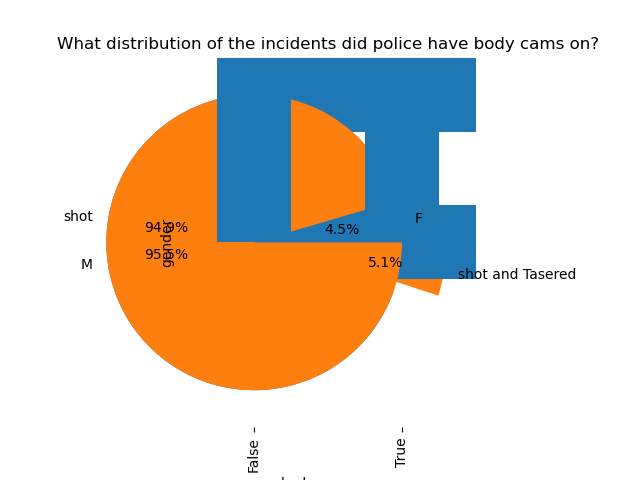

In [14]:
# Checking for Outliers & Anomalies in the age column as it is our only numerical column
sns.boxplot(df['age'])
  
plt.show()

We decided to keep our outliers because we saw that the data will be useful in our analysis when analysing about age.

**Anomilies**

In [15]:
#Selecting the categorical columns
cat_cols = df.select_dtypes(include ='object').columns.to_list()
cat_cols


# Check for unique values in each column
for col in cat_cols:
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('...........')
  print('\n')

name column unique values: 

['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ... 'Hannah Fizer'
 'William Slyter' 'Nicholas Hirsh']
...........


date column unique values: 

['1/2/2015' '1/3/2015' '1/4/2015' ... '6/12/2020' '6/13/2020' '6/15/2020']
...........


manner_of_death column unique values: 

['shot' 'shot and Tasered']
...........


armed column unique values: 

['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' 'unknown' 'shovel'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'metal object'
 'screwdriver' 'lawn mower blade' 'flagpole' 'guns and explosives'
 'cordless drill' 'metal pole' 'Taser' 'metal pipe' 'metal hand tool'
 'blunt object' 'metal stick' 'sharp object' 'meat cleaver' 'carjack'
 'chain' "contractor's level" 'stapler' 'crossbow' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain saw' 'garden tool'
 'scissors' 'pole' 'pick-axe' 'flashlight' 'vehicle' 'spear' 'chair'


In [16]:
#convert date column to datetime

df['date'] = pd.to_datetime(df['date'])

In [17]:
#Check if data was corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   float64       
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

from the output our data seems clean, no null values and no duplicates, no outliers and we have standard names for all columns

# **6. EXPORT CLEAN DATA**

In [18]:
#saving the cleaned dataset
df = df.to_csv('./content/us_police_shooting.csv')

#df = df_sample.to_excel('name.xlsx')


In [19]:
#loading the saved clean dataset
df = pd.read_csv('./content/us_police_shooting.csv')
# df = df.set_index('id')
df.drop(['Unnamed: 0'],axis=1,inplace = True)


# **7. Exploratory Analysis**

## a) Univariate Analysis

### ***Measures of Central Tendency***

In [20]:
#getting summary
df.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895.000000,4895,4895,4895,4895,4895.000000,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,NaN,4851,1792,2,89,NaN,2,6,2288,51,2,3,4,2,12
top,NaN,TK TK,2018-04-01,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,NaN,29,9,4647,2755,NaN,4673,2476,78,701,3792,3160,3073,4317,2764
mean,2902.148519,NaN,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1683.467910,NaN,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1441.500000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2847.000000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4352.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Mode
# Calculating mode across different columns

df[['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category']].mode().head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,TK TK,2018-01-06,shot,gun,25.0,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns


In [22]:
modedf =pd.DataFrame()
modedf

data = {'Criteria': ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'], 
       'The most appearing record': ['3','TK','2018-01-06','shot','gun','25','Male','White','Los Angelos','CA','False','attack','Not Fleeing','False','Guns']} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The most appearing record
0,id,3
1,name,TK
2,date,2018-01-06
3,manner_of_death,shot
4,armed,gun
5,age,25
6,gender,Male
7,race,White
8,city,Los Angelos
9,state,CA


In [23]:
# Mean
# Calculating the mean for our numerical columns
df[['age']].mean(axis=0)

age    36.54975
dtype: float64

> The average age of people who were shot is   37

In [24]:
# Median
# Calculating the median for our numerical columns

df[['age']].median(axis=0)

age    35.0
dtype: float64

> The median age of people who were shot is 35

### ***Measures of Dispersion***

In [25]:
# Standard Deviation & Variance
# We will now calculate the standard deviation and variance to check the spread of our data from the mean
range1 = df['age'].max() - df['age'].min()

std = df['age'].std()
var = df['age'].var()
print('Range: "Age" ', range1) 
print('Std deviation:', std)
print('Variance:', var)

Range: "Age"  85.0
Std deviation: 12.694348090758691
Variance: 161.1464734493488


column has a high standard deviation and variance, showing that they're both spread over a wide range as evidenced by the ranges

In [26]:
# Skewness
# We will now calculate the skewness to check the assymetry of the distribution
df['age'].skew()

0.7149514194510787

> Our age column is positively skewed, indicating that the tail is bigger on the left side

In [27]:
# Kurtosis
# We will now calculate the kurtosis to check the tail of our distribution
df['age'].kurt()

0.1658018205712728

Low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution. This indicates that we have a platykurtic distribution


In [28]:
print('Skewness:',df['age'].skew())
print("Kurtosis:",df['age'].kurt())
plt.hist(df['age'], bins=5)
plt.title('Histogram of Age distibution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Skewness: 0.7149514194510787
Kurtosis: 0.1658018205712728


In [29]:
# Creating a subset with first strata sample data

#one_sample =  df_sample.loc[df2_sample['column name']==row value] 

#Creating a subset with second strata sample data
#two_sample =  df_sample.loc[df2_sample['column name']==row value] 

#one_sample.head()
#two_sample.head()

In [30]:
#df_sample.columns

In [31]:
# Creating a stratified random sample by grouping the dataset by variable a/ variable b
# Then extracting sample units from each group
# The sample size is calculated with 0.05 as the margin of error, and 95% as the confidence level 

#df_sample = df.groupby('column name', group_keys=False).apply(lambda x : x.sample(replace='False', frac=((4895/(1+4895*(0.05**2)))/10024)))

# Print the number of sample units from each strata
#print(df_sample['column name'].value_counts())

# Display some of the sample data 
#df_sample

##Univariate Plots

In [32]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [33]:
# col=['armed',
#        'gender', 'race', 'city', 'signs_of_mental_illness',
#        'threat_level', 'flee', 'body_camera', 'arms_category']
# fig, ax = plt.subplots(len(col), figsize=(5,10))
# for i, col_val in enumerate(col()):
#     sns.distplot(df[col_val], ax=ax[i], kde=True, color='blue')
#     ax[i].set_title('Box plot - {}'.format(col_val))
#     ax[i].set_xlabel(col_val)
# plt.show()

In [34]:
#Visualization of race  
df.groupby('race')['race'].count().sort_values(ascending=True).plot(title = 'Plot of races', kind = 'barh')

In [35]:
#Visualization of manner of death
explode=(0,0.3)
df.groupby('manner_of_death').manner_of_death.count().plot(title = 'Comparison of manner of death', 
                                                                  kind = 'pie',autopct='%1.1f%%', explode=explode);

In [36]:
#visulization of armed
df['armed'].value_counts()
df.groupby('armed')['armed'].count().sort_values(ascending=False).head().plot(title = 'Arms carried by suspect', 
                                                                  kind = 'barh');

In [37]:
#gender distibution
df.groupby('gender').gender.count().plot(title = 'Distribution of the genders of victims', kind = 'pie',autopct='%1.1f%%')

In [38]:
#Plot of mental status
df.groupby('signs_of_mental_illness').signs_of_mental_illness.count().plot(title = 'Did victims seem mentally ill?', kind = 'bar')

In [39]:
#plotting threat level bar
df.groupby('threat_level').threat_level.count().plot(title = 'What level of threat did the victims present?', kind = 'bar')

In [40]:

#Visulazation of flee
df.groupby('flee').flee.count().sort_values(ascending=False).plot(title = 'What distribution of the victims attempted to flee',
                                                                  kind = 'bar', )
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

In [41]:
#visualizing the body camera information 
df.groupby('body_camera').body_camera.count().plot(title = 'What distribution of the incidents did police have body cams on?', kind = 'bar')

##Bivariate Plots

<IPython.core.display.Javascript object>


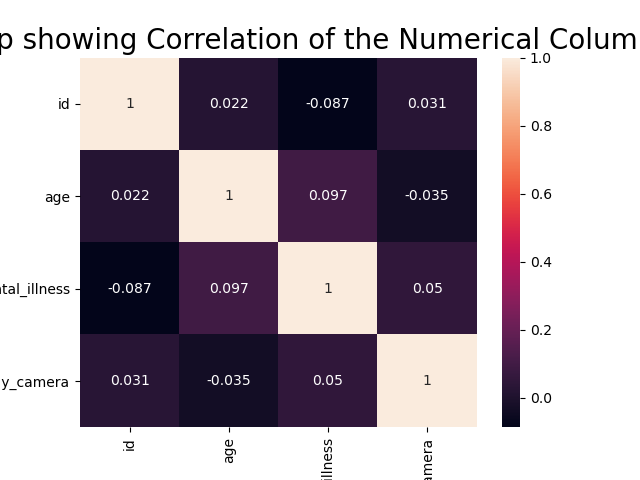

In [42]:
#Calculating the correlation
corr = df.corr()
plt.figure()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title('Heatmap showing Correlation of the Numerical Columns', fontsize = 20)
plt.show()

<IPython.core.display.Javascript object>


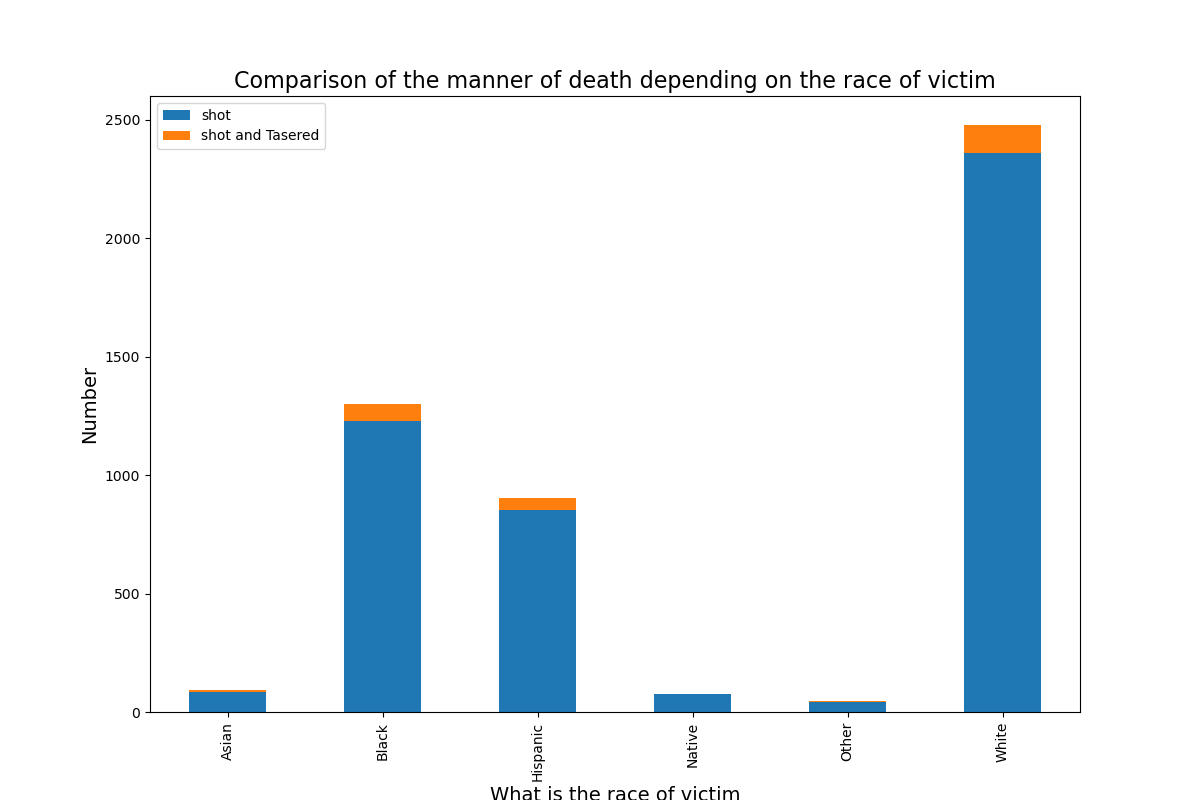

In [43]:
#Plotting our bar graph 
df.groupby(['race','manner_of_death']).id.count().sort_values(ascending=False).unstack().plot(kind='bar',figsize=(12,8),stacked = True)

# labels and title
plt.title('Comparison of the manner of death depending on the race of victim',fontsize=16)
plt.xlabel('What is the race of victim',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


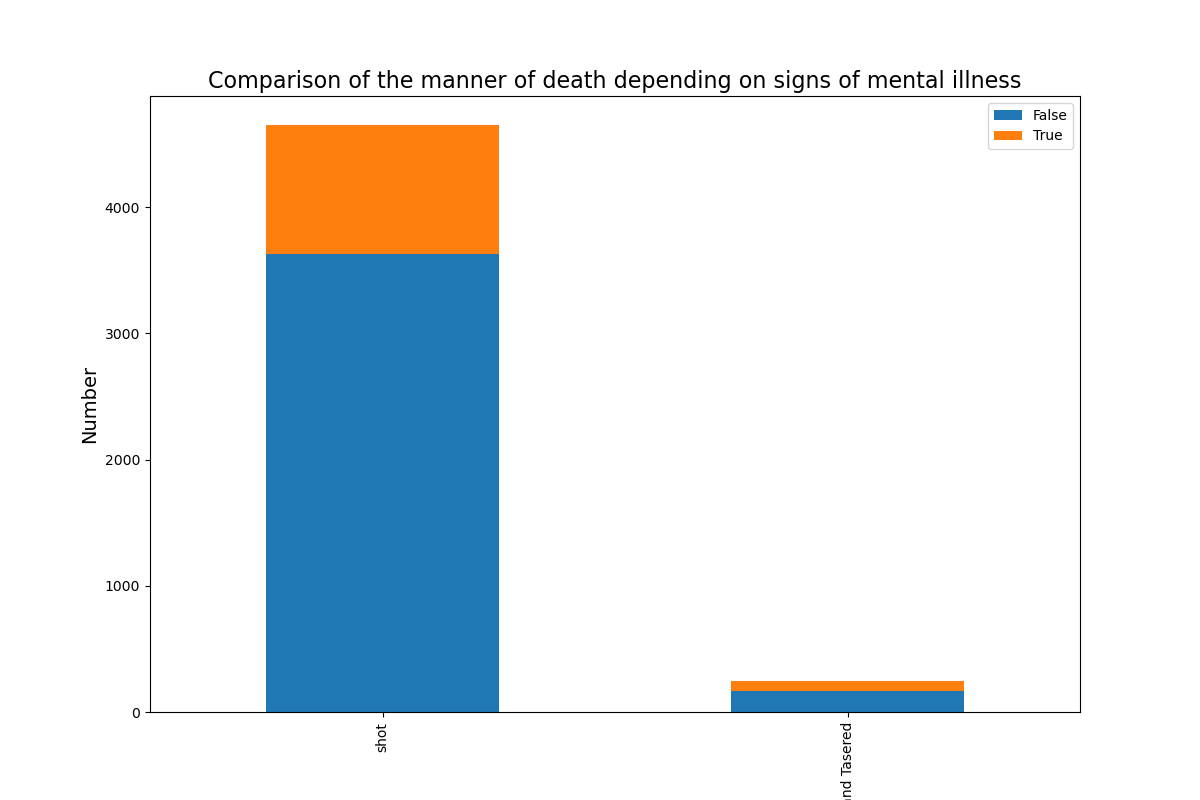

In [44]:
#Plotting our bar graph 
df.groupby(['manner_of_death','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8),stacked = True)

# labels and title
plt.title('Comparison of the manner of death depending on signs of mental illness',fontsize=16)
plt.xlabel('Were there any signs of mental illness',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


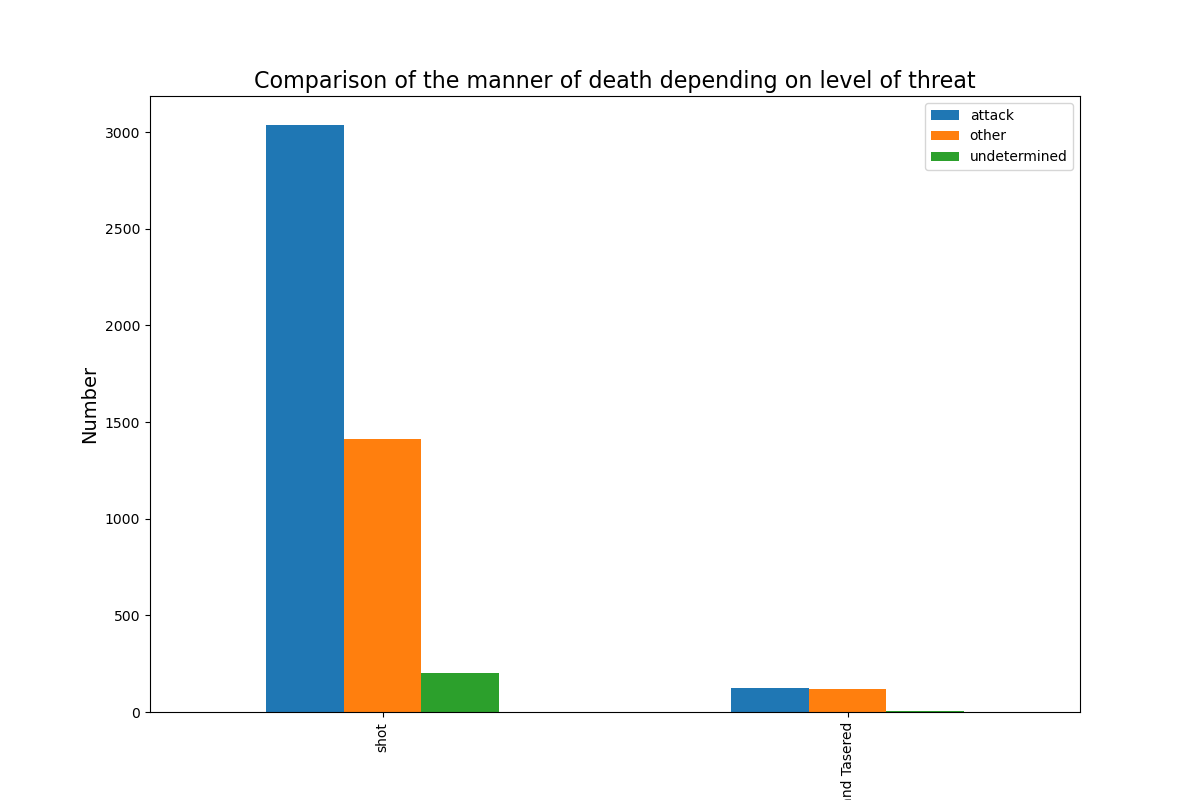

In [45]:
#Plotting our bar graph 
df.groupby(['manner_of_death','threat_level']).id.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Comparison of the manner of death depending on level of threat',fontsize=16)
plt.xlabel('Level of threat',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


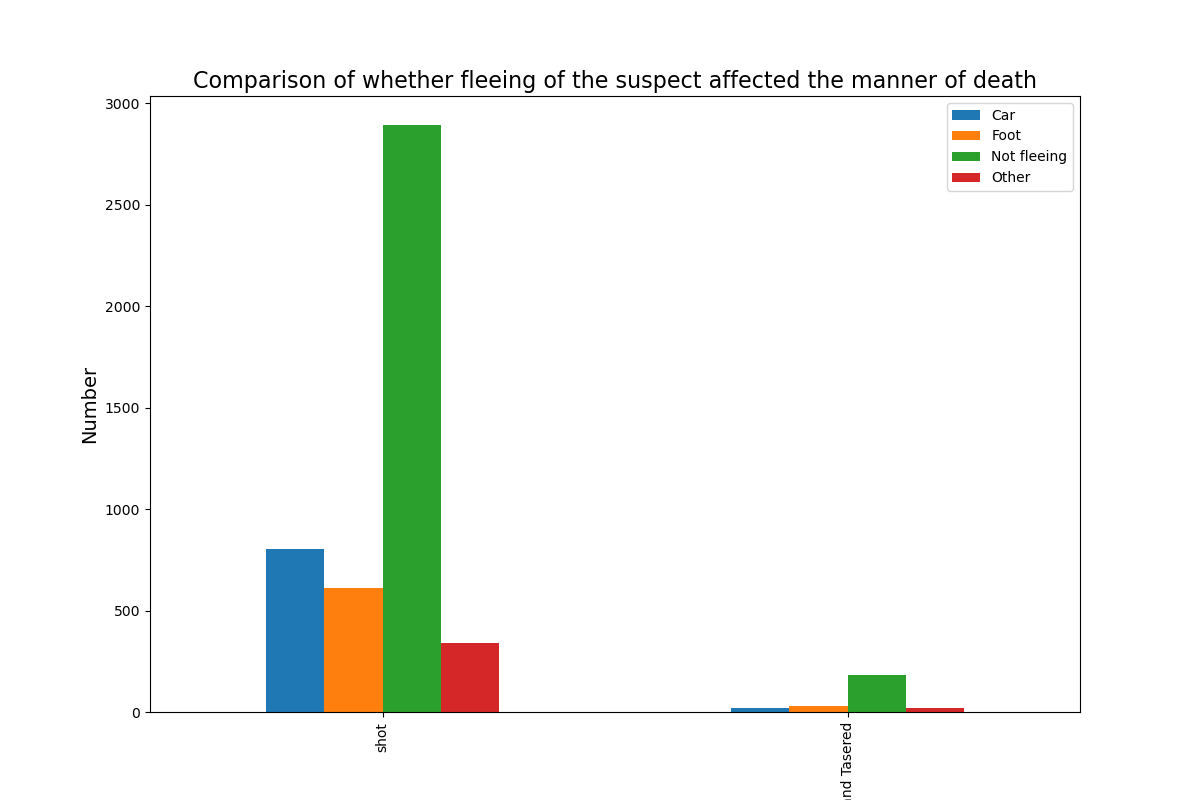

In [46]:
#Plotting our bar graph 
df.groupby(['manner_of_death','flee']).id.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Comparison of whether fleeing of the suspect affected the manner of death',fontsize=16)
plt.xlabel('How did the suspect flee',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


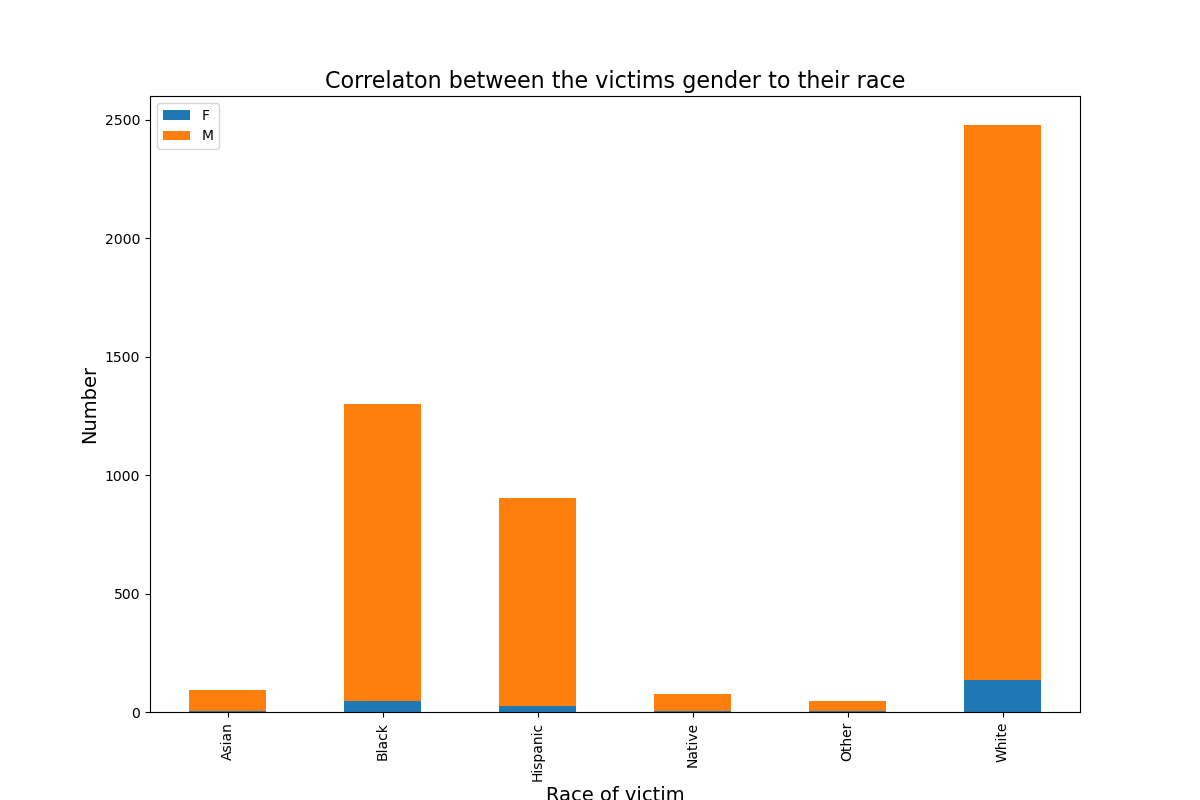

In [47]:
#Plotting our bar graph 
df.groupby(['race','gender']).id.count().sort_values(ascending=False).unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims gender to their race',fontsize=16)
plt.xlabel('Race of victim',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


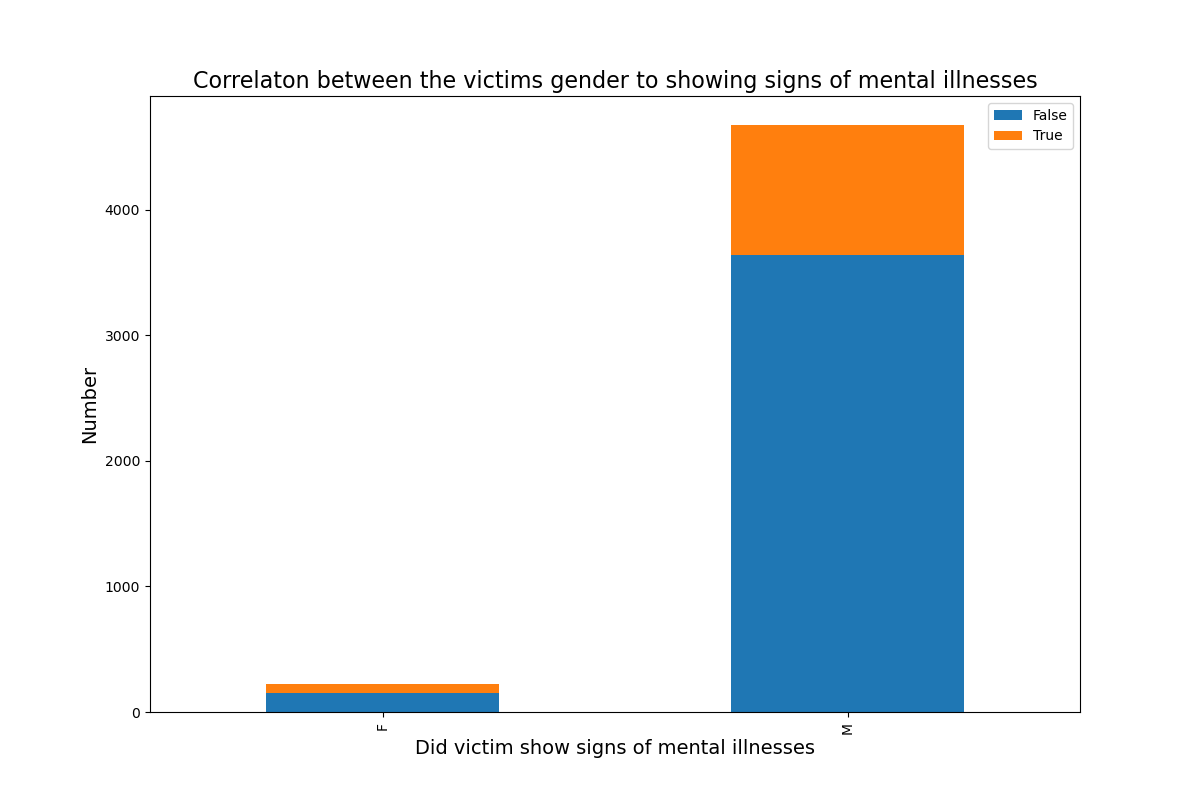

In [48]:
#Plotting our bar graph 
df.groupby(['gender','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8),stacked=True) 

# labels and title
plt.title('Correlaton between the victims gender to showing signs of mental illnesses',fontsize=16)
plt.xlabel('Did victim show signs of mental illnesses',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


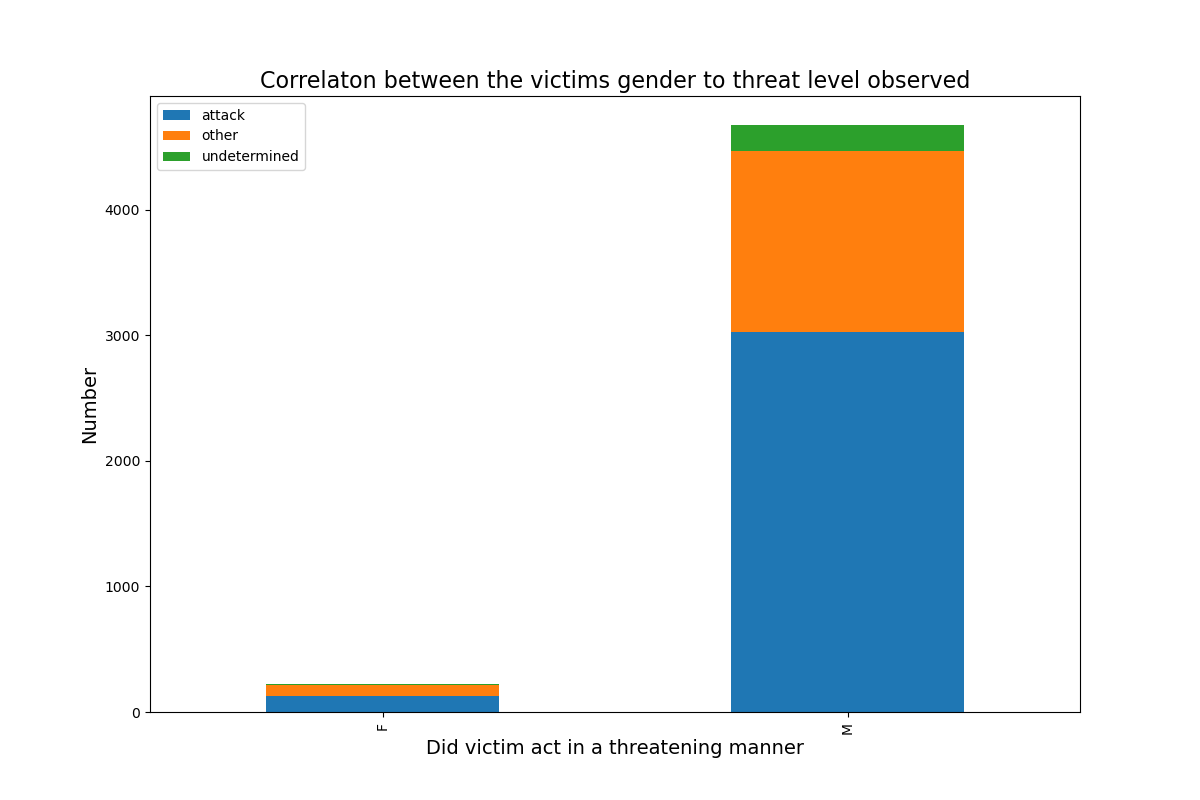

In [49]:
#Plotting our bar graph 
df.groupby(['gender','threat_level']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims gender to threat level observed',fontsize=16)
# plt.xticks(rotation = 60)
plt.xlabel('Did victim act in a threatening manner',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


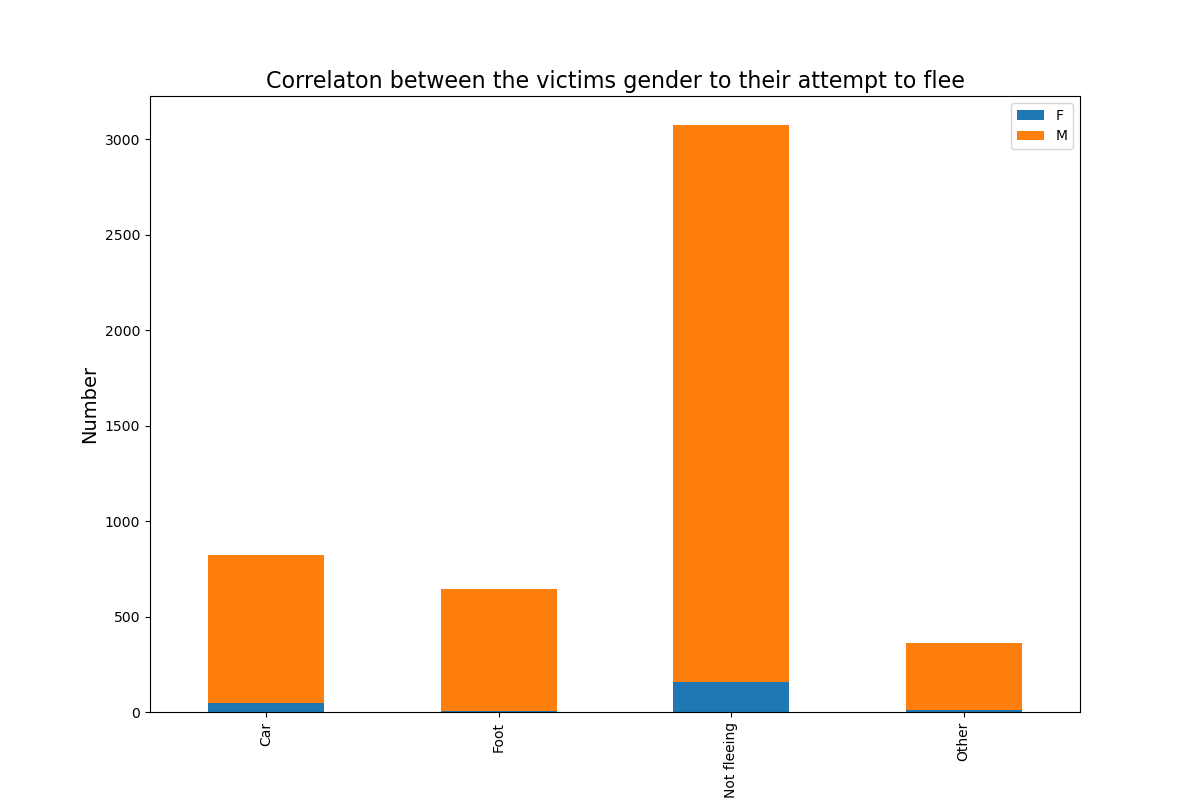

In [50]:
#Plotting our bar graph 
df.groupby(['flee','gender']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims gender to their attempt to flee',fontsize=16)
plt.xlabel('Did victim attempt to flee? and if they did how?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


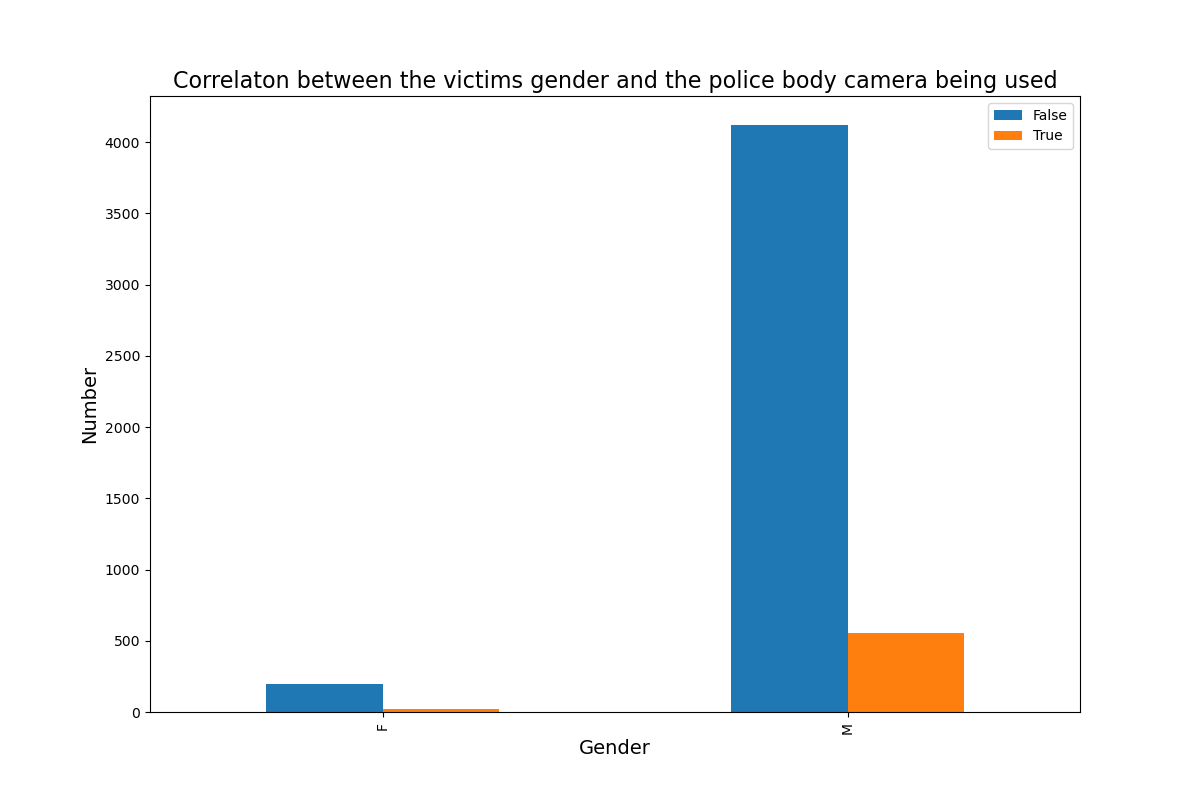

In [51]:
#Plotting our bar graph 
df.groupby(['gender','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims gender and the police body camera being used',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


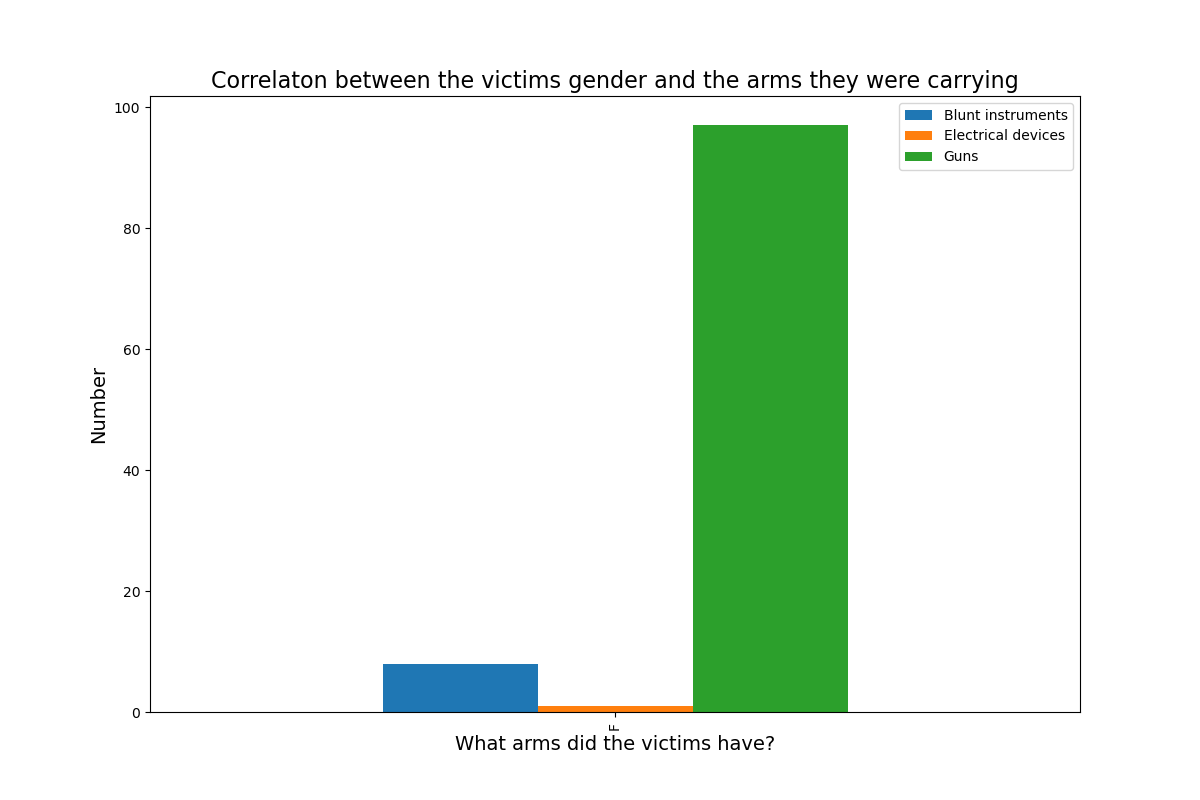

In [52]:
#Plotting our bar graph 
df.groupby(['gender','arms_category']).id.count().head(3).unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims gender and the arms they were carrying',fontsize=16)
plt.xlabel('What arms did the victims have?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


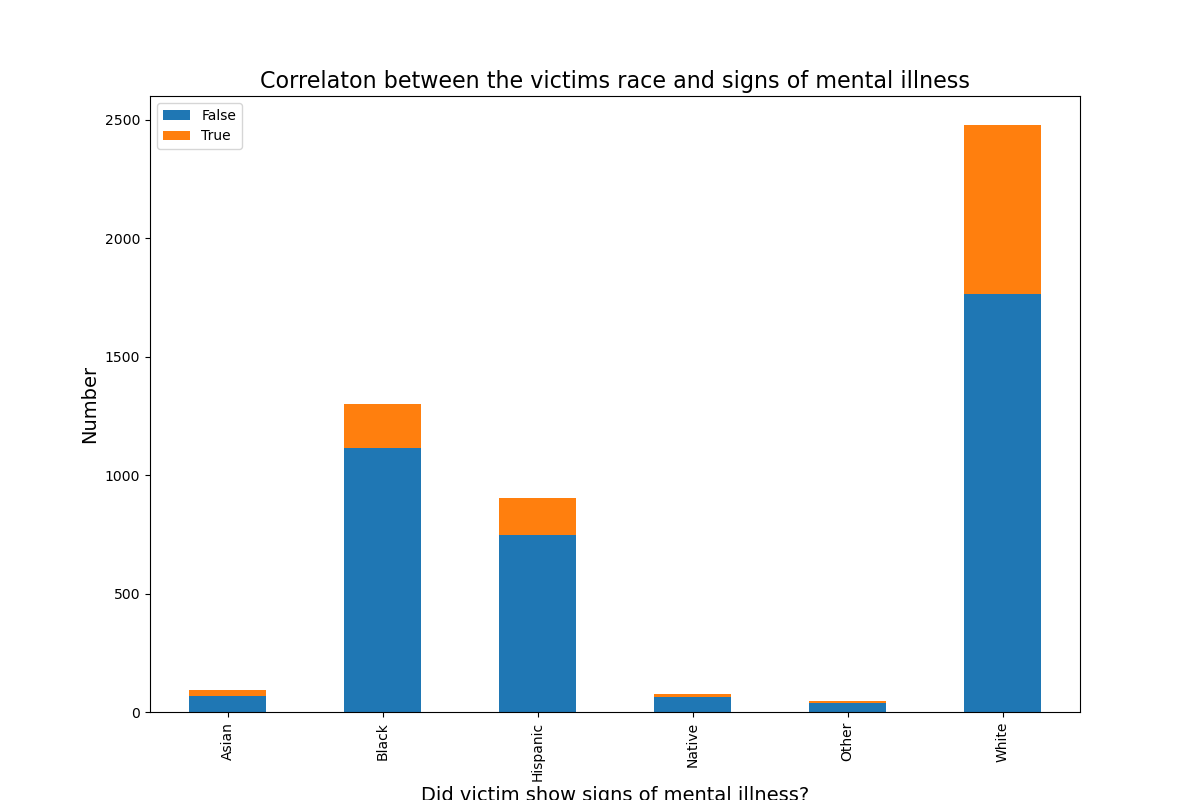

In [53]:
#Plotting our bar graph 
df.groupby(['race','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims race and signs of mental illness',fontsize=16)
plt.xlabel('Did victim show signs of mental illness?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


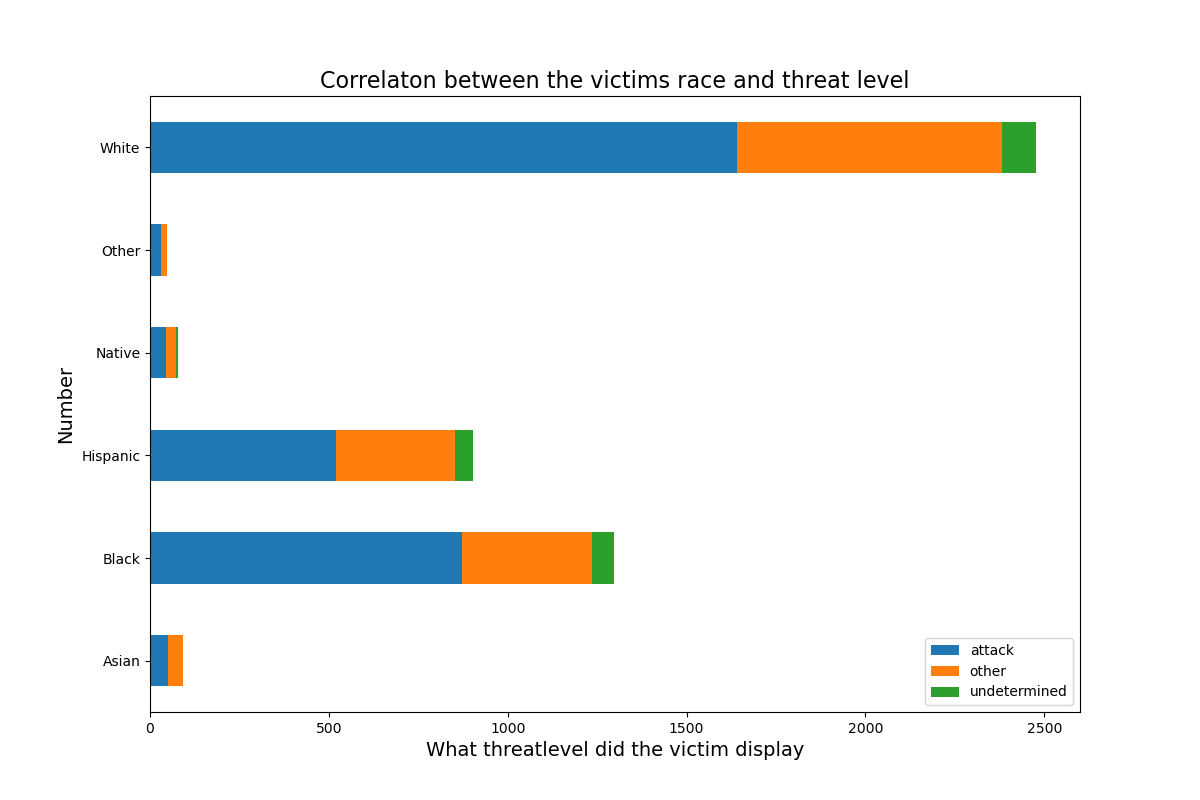

In [54]:
#Plotting our bar graph 
df.groupby(['race','threat_level']).id.count().sort_values(ascending =True).unstack().plot(kind='barh',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims race and threat level',fontsize=16)
plt.xlabel('What threatlevel did the victim display',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


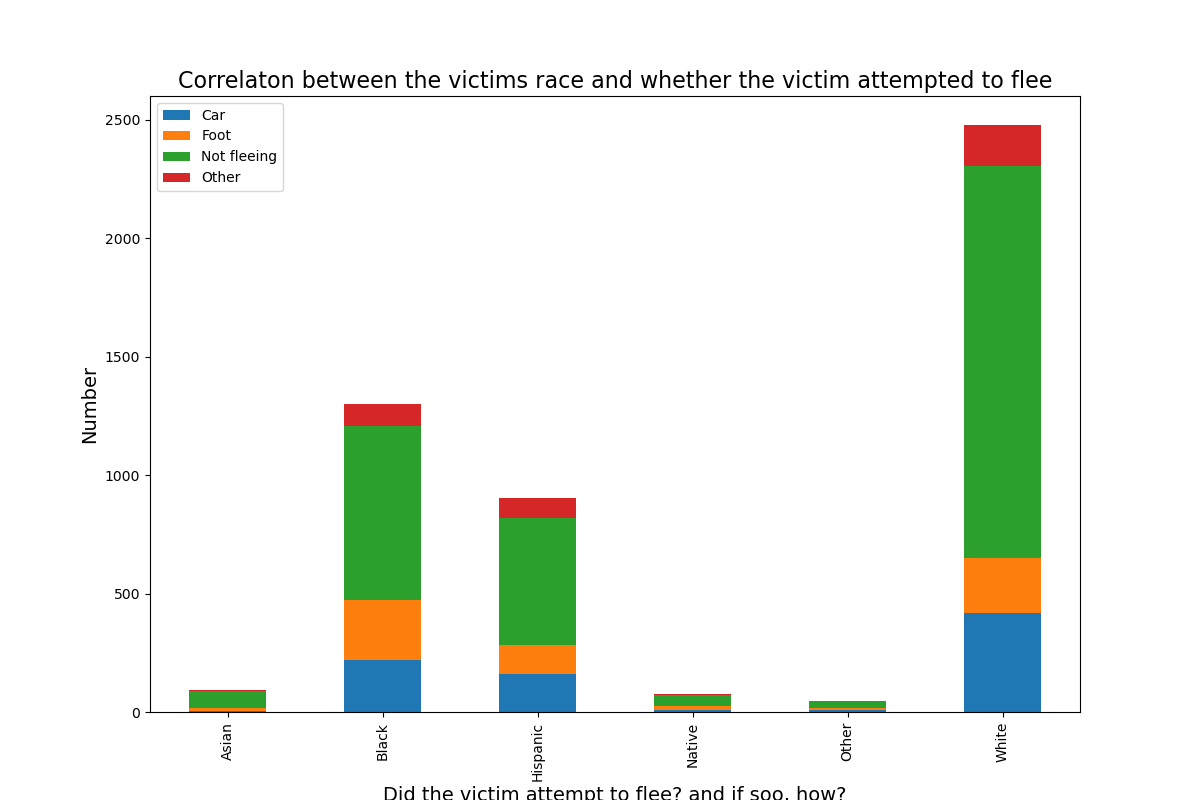

In [55]:
#Plotting our bar graph 
df.groupby(['race','flee']).id.count().unstack().plot(kind='bar',figsize=(12,8),stacked = True) 

# labels and title
plt.title('Correlaton between the victims race and whether the victim attempted to flee',fontsize=16)
plt.xlabel('Did the victim attempt to flee? and if soo, how?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


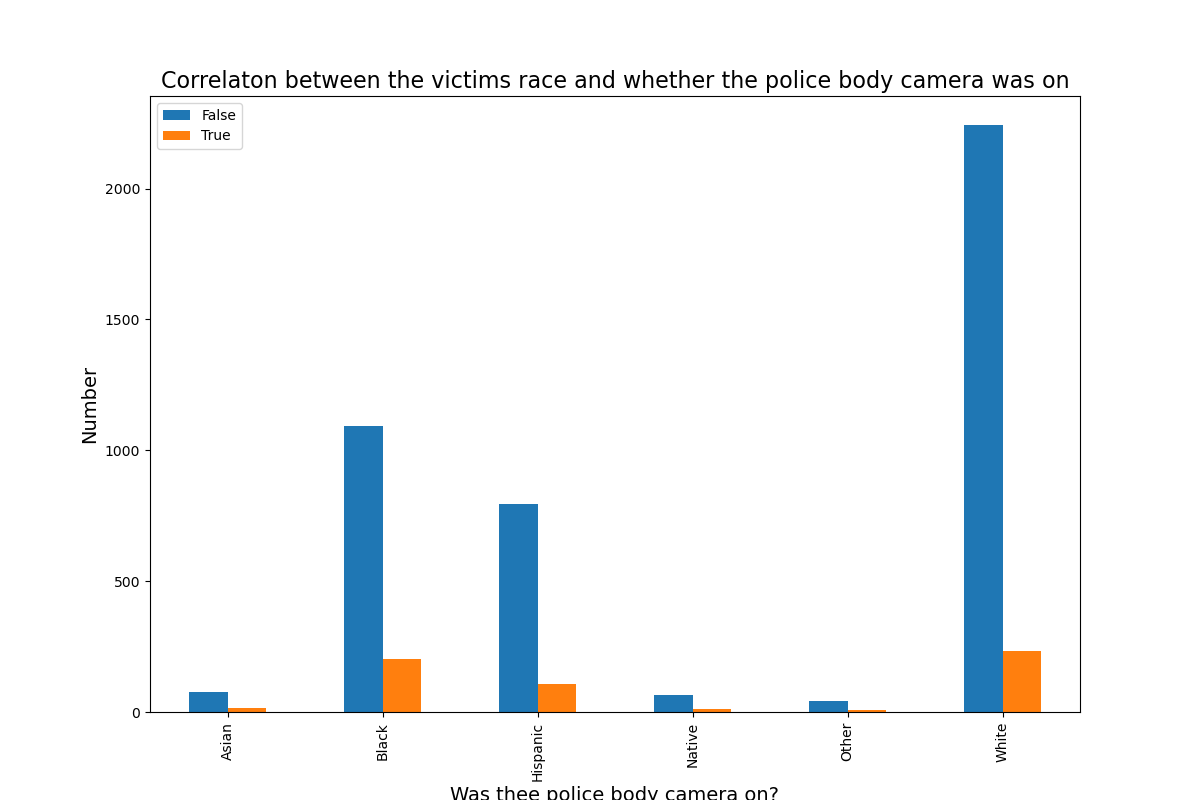

In [56]:
#Plotting our bar graph 
df.groupby(['race','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims race and whether the police body camera was on',fontsize=16)
plt.xlabel('Was thee police body camera on?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


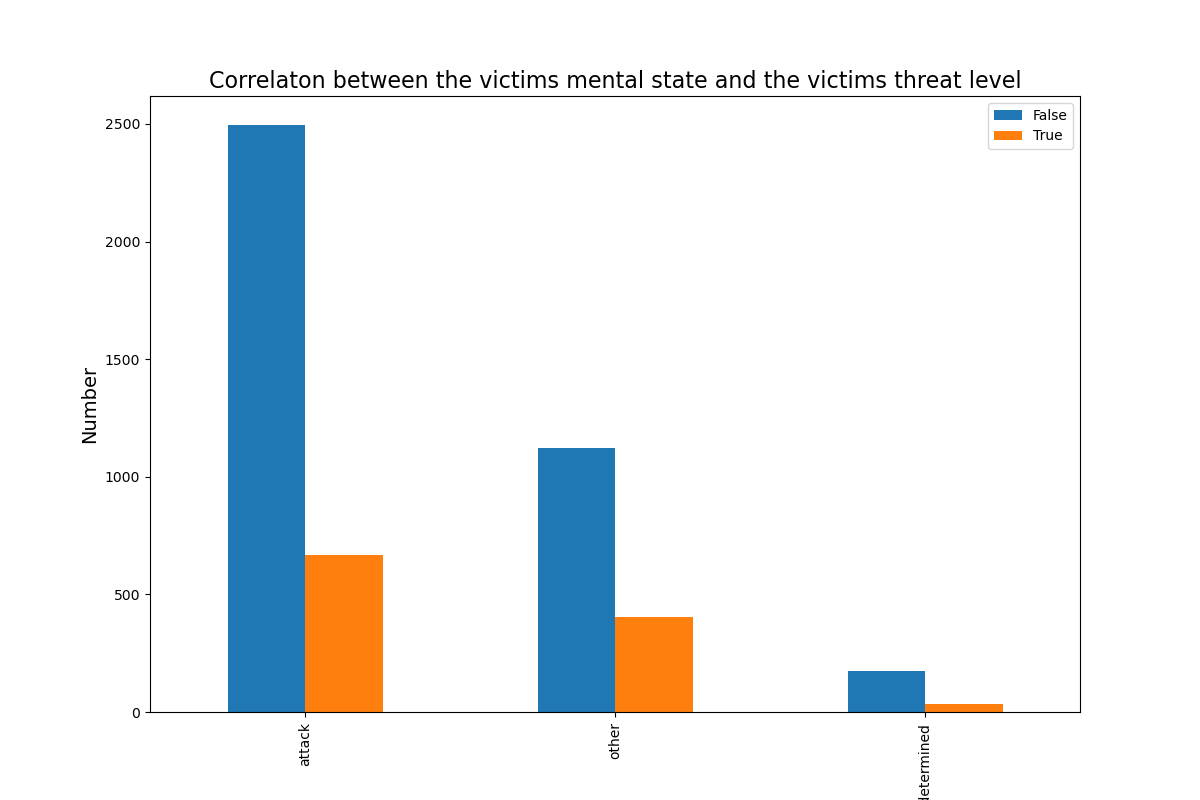

In [57]:
#Plotting our bar graph 
df.groupby(['threat_level','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims mental state and the victims threat level',fontsize=16)
plt.xlabel('What threat level did the victim display',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


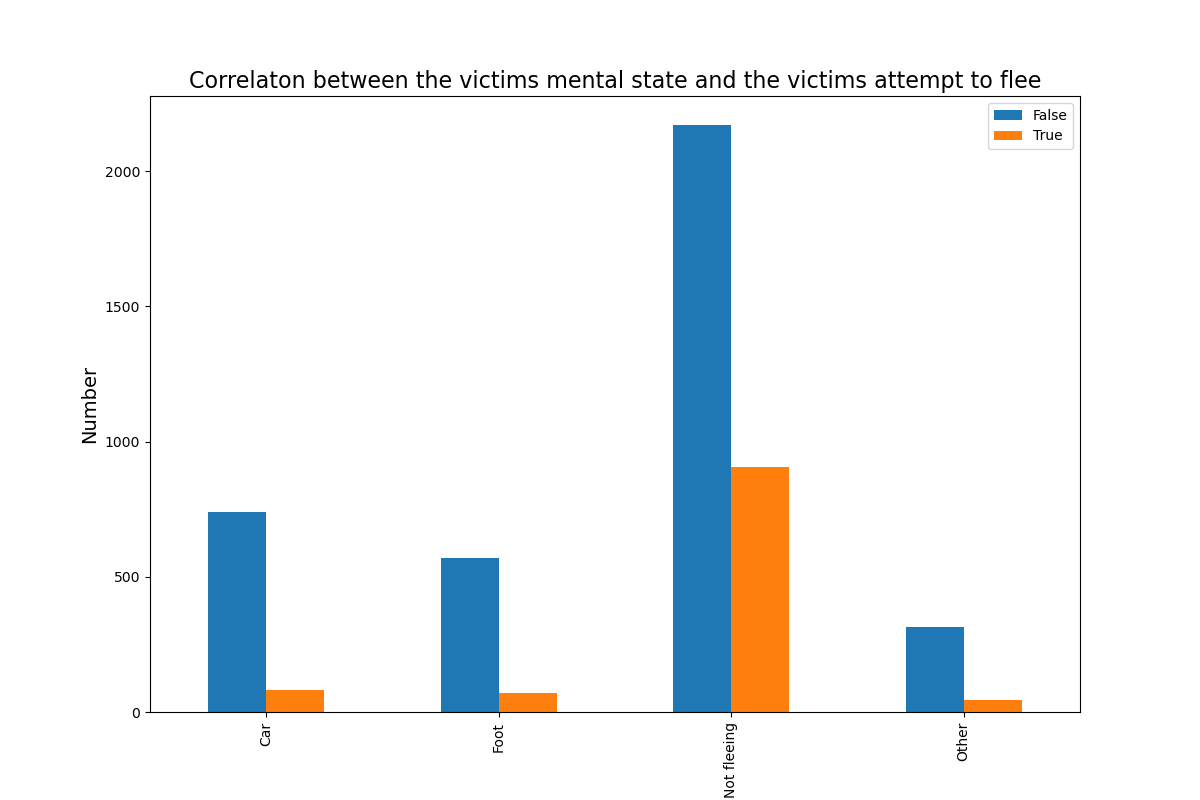

In [58]:
#Plotting our bar graph 
df.groupby(['flee','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims mental state and the victims attempt to flee',fontsize=16)
plt.xlabel('Did the victim attempt to flee?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


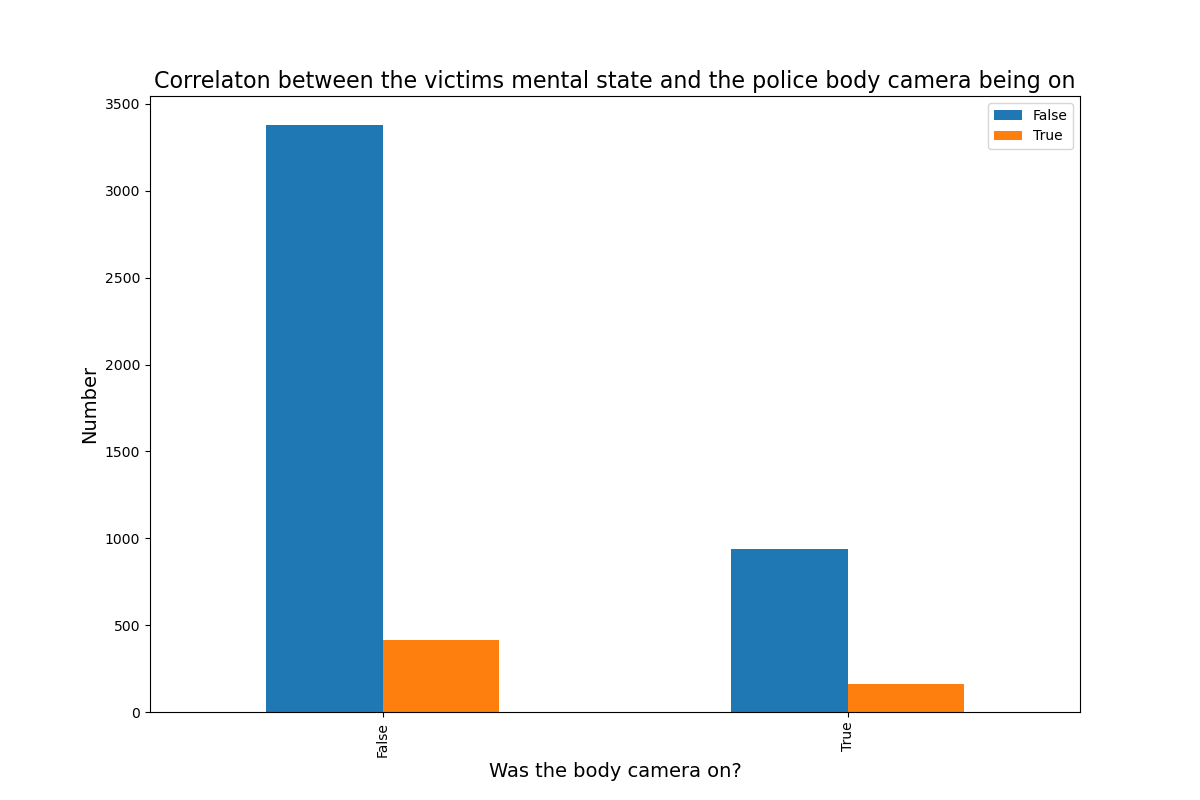

In [59]:
#Plotting our bar graph 
df.groupby(['signs_of_mental_illness','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims mental state and the police body camera being on',fontsize=16)
plt.xlabel('Was the body camera on?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


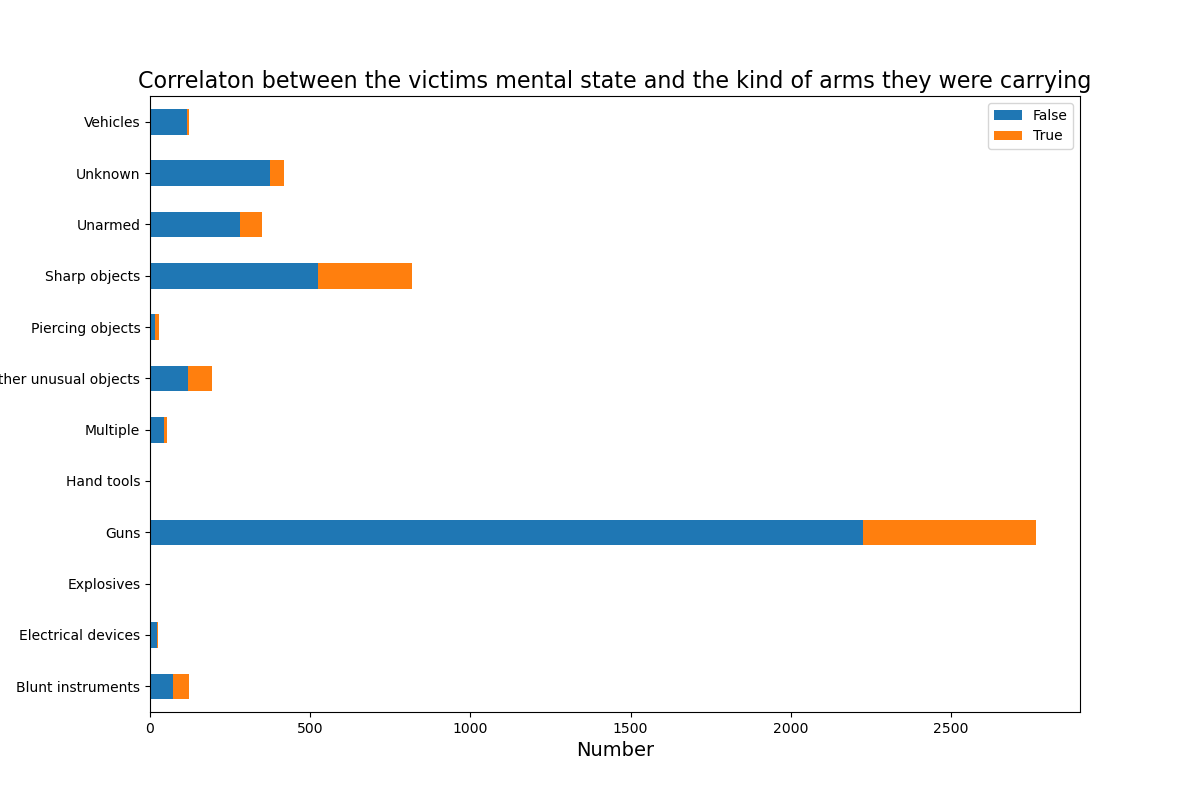

In [60]:
#Plotting our bar graph 
df.groupby(['arms_category','signs_of_mental_illness']).id.count().unstack().plot(kind='barh',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims mental state and the kind of arms they were carrying',fontsize=16)
plt.ylabel('What arms were the victims carrying?',fontsize=14)
plt.xlabel('Number',fontsize=14)
plt.legend(fontsize=10)

C:\Users\Rino\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


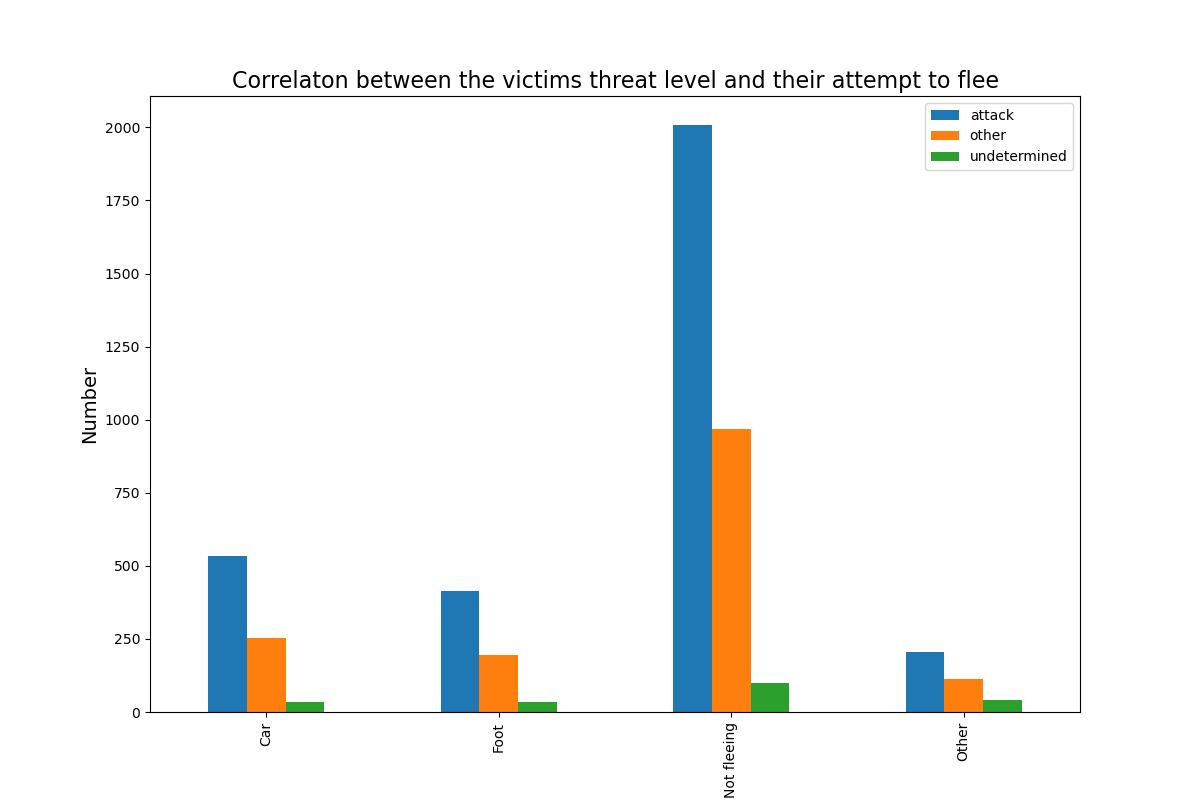

In [61]:
#Plotting our bar graph 
df.groupby(['flee','threat_level']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims threat level and their attempt to flee',fontsize=16)
plt.xlabel('How did the victim attempt to flee',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


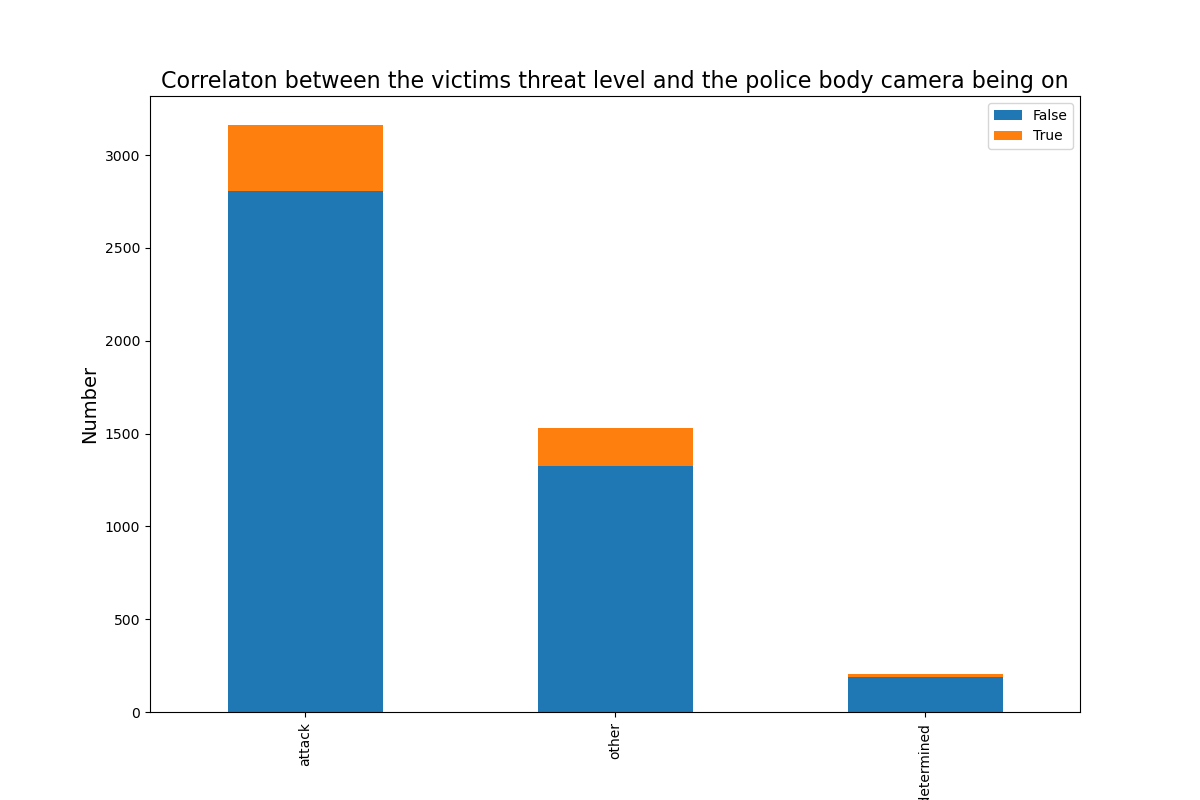

In [62]:
#Plotting our bar graph 
df.groupby(['threat_level','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims threat level and the police body camera being on',fontsize=16)
plt.xlabel('Was the body camera on',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


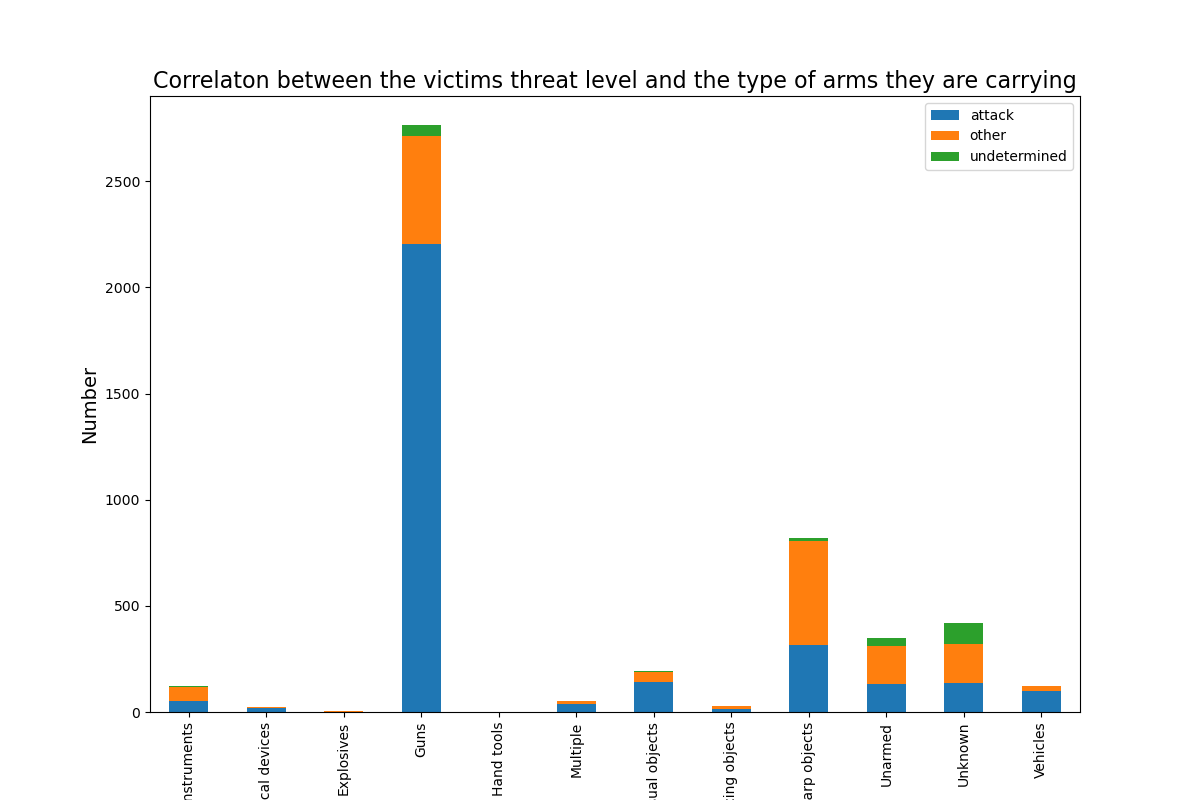

In [63]:
#Plotting our bar graph 
df.groupby(['arms_category','threat_level']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims threat level and the type of arms they are carrying',fontsize=16)
plt.xlabel('What arms were the victims carrying',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


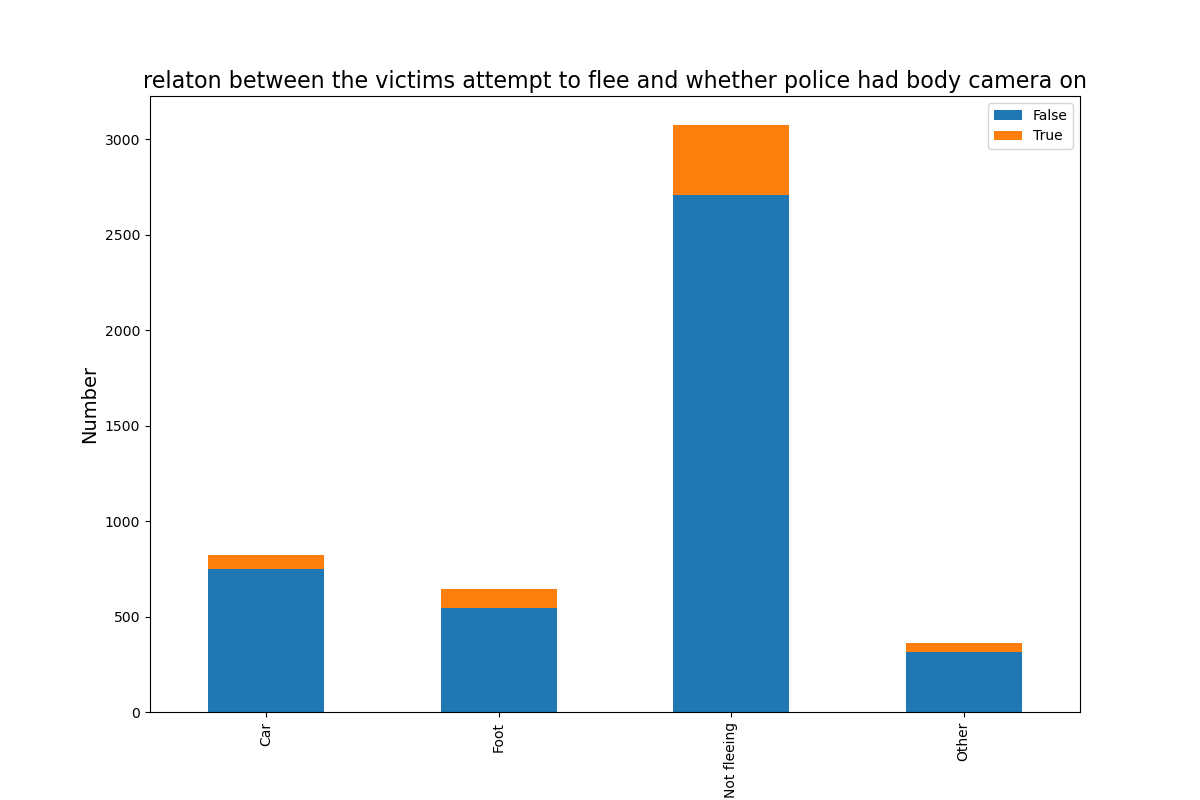

In [64]:
#Plotting our bar graph 
df.groupby(['flee','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True)

# labels and title
plt.title('relaton between the victims attempt to flee and whether police had body camera on',fontsize=16)
plt.xlabel('Was the body camera on',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


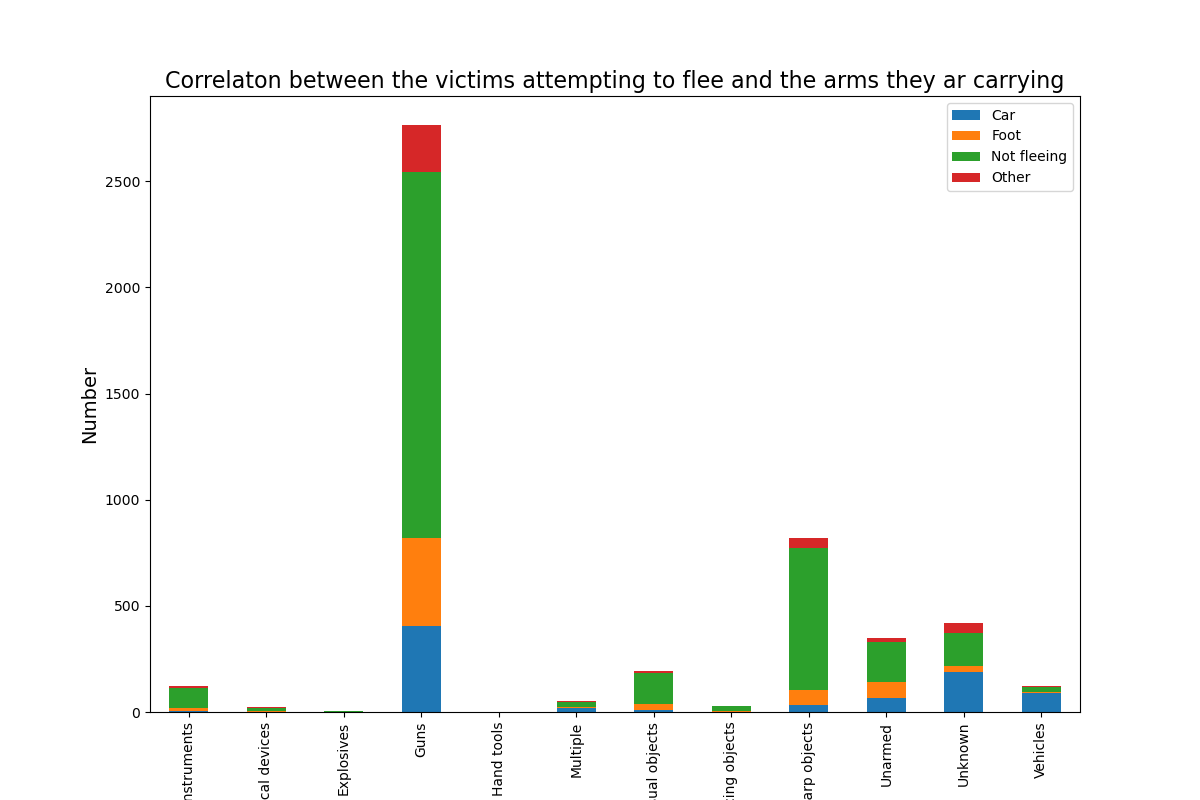

In [65]:
#Plotting our bar graph 
df.groupby(['arms_category','flee']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims attempting to flee and the arms they ar carrying',fontsize=16)
plt.xlabel('What arm was the victim carrying',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


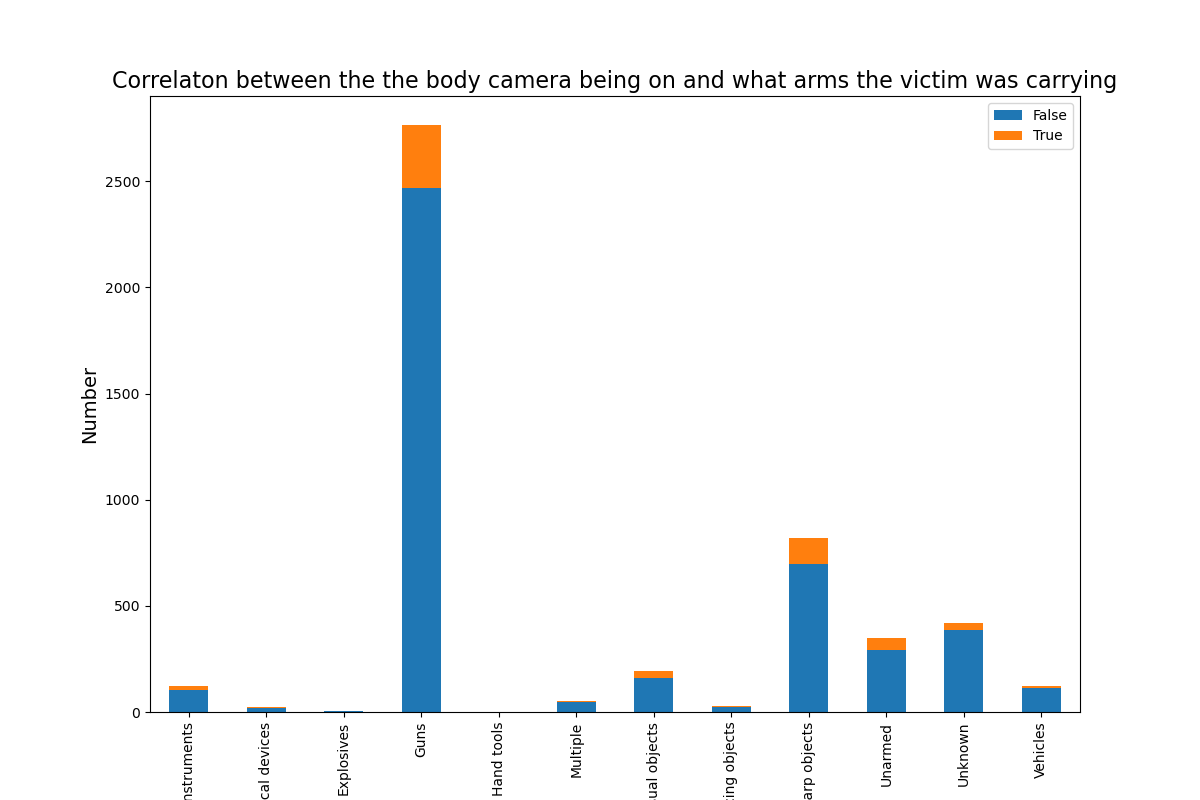

In [66]:
#Plotting our bar graph 
df.groupby(['arms_category','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the the body camera being on and what arms the victim was carrying',fontsize=16)
plt.xlabel('What arms was the victim carrying',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


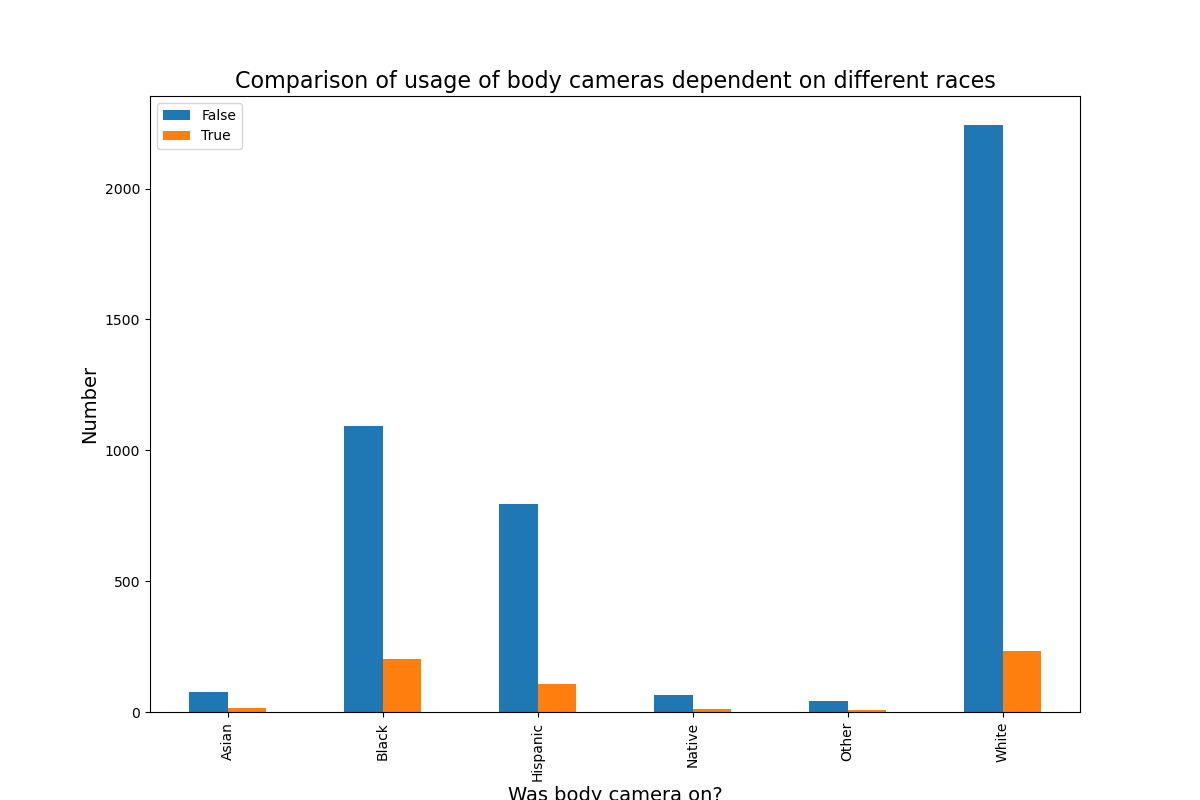

In [67]:
#Plotting our bar graph 
df.groupby(['race', 'body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Comparison of usage of body cameras dependent on different races',fontsize=16)
plt.xlabel('Was body camera on?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

##Multivariate Plots

In [68]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [69]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  
# from pandas_profiling import ProfileReport

# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [70]:
# profile = ProfileReport(df, title='Pandas Profiling Report - Police Shooting in the US', explorative=True)
# profile.to_widgets()

In [71]:
# ## Check the equality of the variances between the two groups using Levene's test

# stat,p = stats.levene(day_sample['bluecars_taken_sum'], end_sample['bluecars_taken_sum'], center='mean') 
# # we use center = mean because our samples are fairly/moderately skewed

# print('Statistic=%.4f, pvalue=%.4f' % (stat, p))
# print('\n')
# # Interpretation of the Levene's test results

# alpha = 0.05
# if p <= alpha:
# 	print('The two variances are significantly different')
# else:
# 	print('The two variances are approximately equal')
# print('\n')
# print('\n')
# # calculate the means

# # a) of the bluecars taken on monday dataframe

# day_mean = day_sample['bluecars_taken_sum'].mean()

# print('The mean of the Monday bluecars rented out data sample is: ', day_mean)
# print('\n')
# print('\n')
# # b) of the bluecars taken on Friday dataframe

# end_mean = end_sample['bluecars_taken_sum'].mean()

# print('The mean of the Friday bluecars rented out data sample is: ', end_mean)
# print('\n')
# print('\n')
# # calculate the standard deviation:

# # a) of the bluecars taken on monday dataframe

# day_std = day_sample['bluecars_taken_sum'].std()

# print('The standard deviation of the Monday bluecars rented out data sample is: ', day_std)
# print('\n')
# print('\n')
# # b) of the bluecars taken on friday dataframe

# end_std = end_sample['bluecars_taken_sum'].std()

# print('The standard deviation of the Friday bluecars rented out data sample is: ', end_std)
# print('\n')
# print('\n')
# # calculate the standard error (se = std / sqrt(n)):

# # a) of the bluecars taken on monday dataframe

# day_std_error = day_std/ len(day_sample)

# print('The standard error of the Monday bluecars rented out data sample is: ', day_std_error)
# print('\n')
# print('\n')
# # b) of the bluecars taken on friday dataframe

# end_std_error = end_std/ len(end_sample)

# print('The standard error of the Friday bluecars rented out data sample is ', end_std_error)
# print('\n')
# print('\n')

# difference = sqrt((day_std_error**2) + (end_std_error**2))

# print("the standard error of the difference between the means is:",difference)
# print('\n')
# print('\n')

# #find the T statistic

# t_statistic = (day_mean - end_mean)/difference


# print("The T statistic is",t_statistic)
# print('\n')
# print('\n')


# # find the critical value

# c_value = t.ppf(1.0 - alpha, freedom)

# c_value
# print("the Critical value is", c_value)
# print('\n')
# print('\n')

# **8. Hypothesis Testing**

##Sampling of race
We are going to first group the races by whites and other minority races which will then be sampled  by use of proportionate stratified sampling in comparison to the US population. We decided to use this sampling method so that each strata will be a proportionate representative of the US population.

Null hypothesis: Minority races shot by police are more that the white races

Alternative hypothesis: Minority races shot by police are not more that the white races.

Keys

$H_{0}$ = Null hypothesis

$H_{1}$ = Alternative hypothesis

$mu_{1}$ = *Average number of Bluecars taken from stations on Mondays*

$mu_{2}$ = *Average number of Bluecars taken from stations on Fridays*

$H_{0}$: $mu_{1}$ = $mu_{2}$


In [72]:
ndf = df.copy()

In [73]:
ndf.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [74]:
#encoding minority data frame
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

ndf['manner_of_death']=lb.fit_transform(ndf['manner_of_death'].astype(str))
ndf['armed']=lb.fit_transform(ndf['armed'].astype(str))
ndf['gender']=lb.fit_transform(ndf['gender'].astype(str))
ndf['race']=lb.fit_transform(ndf['race'].astype(str))
ndf['city']=lb.fit_transform(ndf['city'].astype(str))
ndf['state']=lb.fit_transform(ndf['state'].astype(str))
ndf['threat_level']=lb.fit_transform(ndf['threat_level'].astype(str))
ndf['flee']=lb.fit_transform(ndf['flee'].astype(str))
ndf['arms_category']=lb.fit_transform(ndf['arms_category'].astype(str))

In [75]:
newdf = ['manner_of_death','armed','gender','race','city','state','threat_level','flee','arms_category']

In [76]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# nndf = ndf.copy()
# nndf[newdf] = scaler.fit_transform(nndf[newdf])
# ndf = nndf

In [77]:
ndf.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,0,35,53.0,1,0,1889,47,True,0,2,False,3
1,4,Lewis Lee Lembke,2015-01-02,0,35,47.0,1,5,33,37,False,0,2,False,3
2,5,John Paul Quintero,2015-01-03,1,81,23.0,1,2,2236,16,False,1,2,False,9
3,8,Matthew Hoffman,2015-01-04,0,80,32.0,1,5,1826,4,True,0,2,False,6
4,9,Michael Rodriguez,2015-01-04,0,59,39.0,1,2,647,5,False,0,2,False,7


In [78]:
# Creating a subset with Monday sample data

white =  ndf.loc[df['race']=='White'] # Monday is 0 according to the glossary

#Creating a subset with Friday sample data
minority =  ndf.loc[df['race']!='White'] # Since Monday 0, Friday will be 4


print(white.shape)
white.head()


(2476, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1,4,Lewis Lee Lembke,2015-01-02,0,35,47.0,1,5,33,37,False,0,2,False,3
3,8,Matthew Hoffman,2015-01-04,0,80,32.0,1,5,1826,4,True,0,2,False,6
5,11,Kenneth Joe Brown,2015-01-04,0,35,18.0,1,5,838,36,False,0,2,False,3
7,15,Brock Nichols,2015-01-06,0,35,35.0,1,5,88,16,False,0,2,False,3
8,16,Autumn Steele,2015-01-06,0,81,34.0,0,5,268,12,False,1,2,True,9


In [79]:
#Preview of minority dataset
print(minority.shape)
minority.head()

(2419, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,0,35,53.0,1,0,1889,47,True,0,2,False,3
2,5,John Paul Quintero,2015-01-03,1,81,23.0,1,2,2236,16,False,1,2,False,9
4,9,Michael Rodriguez,2015-01-04,0,59,39.0,1,2,647,5,False,0,2,False,7
6,13,Kenneth Arnold Buck,2015-01-05,0,35,22.0,1,2,344,3,False,0,0,False,3
9,17,Leslie Sapp III,2015-01-06,0,80,47.0,1,1,1056,38,False,0,2,False,6


In [80]:
# stratified random sampling of the white population
white_sample = white.groupby('state', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.2))

#shape of the sample
print(white_sample.shape)

#preview of the sample
white_sample.head()

(492, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4687,5661,Mary Kate Field,2020-03-11,0,35,32.0,0,5,44,0,False,0,3,False,3
2117,2459,Justin Quincy Smith,2017-03-26,0,35,36.0,1,5,2163,0,False,0,3,False,3
2253,2618,Shawn Buck,2017-05-25,0,35,23.0,1,5,651,0,False,0,0,False,3
3269,3819,Garry Glenn Lawrence,2018-06-29,0,5,36.0,1,5,1460,0,False,1,3,False,0
2222,2577,Jonathan David Victor,2017-05-12,0,81,35.0,1,5,115,1,False,1,2,False,9


In [81]:
# stratified random sampling of the minority population
minority_sample = minority.groupby('state', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.2))

#shape of the sample
print(minority_sample.shape)

#preview of the sample
minority_sample.head()

(483, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2971,3494,Dwight Heckman,2018-03-08,0,35,27.0,1,3,1624,0,False,0,1,False,3
3887,4618,Kevin Ray McEnulty,2019-03-31,0,35,25.0,1,3,651,0,False,1,0,False,3
670,816,Vincent J. Perdue,2015-09-09,0,35,33.0,1,3,651,0,False,0,0,False,3
2554,2969,Haraesheo Rice,2017-09-20,0,35,31.0,1,1,948,1,True,0,2,False,3
3581,4212,Eugene Benjamin Weathers,2018-11-21,0,35,48.0,1,1,2026,1,False,0,2,False,3


In [82]:
# ## Check the equality of the variances between the two groups using Levene's test

stat,p = stats.levene(minority_sample['race'].value_counts(), white_sample['race'].value_counts(), center='mean') 
#we use center = mean because our samples are fairly/moderately skewed

print('Statistic=%.4f, pvalue=%.4f' % (stat, p))
print('\n')
#Interpretation of the Levene's test results

alpha = 0.05
if p <= alpha:
	print('The two variances are significantly different')
else:
	print('The two variances are approximately equal')
print('\n')
print('\n')
#calculate the means

# a) of the minorities dataset

minority_mean = minority_sample['race'].mean()

print('The mean of the minority sample data race column is: ', minority_mean)
print('\n')
print('\n')
# b) of the bluecars taken on Friday dataframe

white_mean = white_sample['race'].mean()

print('The mean of the white sample data race column is: ', white_mean)
print('\n')
print('\n')
# calculate the standard deviation:

# a) of the minority races sample dataframe

minority_std = minority_sample['race'].std()

print('The standard deviation of minority sample race column is: ', minority_std)
print('\n')
print('\n')
# b) of the white race sample dataframe

white_std = white_sample['race'].std()

print('The standard deviation of white sample race column is: : ', white_std)
print('\n')
print('\n')
# calculate the standard error (se = std / sqrt(n)):

# a) of the minority race sample dataframe

minority_std_error = minority_std/ len(minority_sample)

print('The standard error of the minority race sample data sample is: ', minority_std_error)
print('\n')
print('\n')
# b) of the white race sample dataframe

white_std_error = white_std/ len(white_sample)

print('The standard error of the white race sample data sample is ', white_std_error)
print('\n')
print('\n')
#Calculate the difference of standard errors
difference = sqrt((minority_std_error**2) + (white_std_error**2))

print("the standard error of the difference between the means is:",difference)
print('\n')
print('\n')

# #find the T statistic

t_statistic = (minority_mean - white_mean)/difference


print("The T statistic is",t_statistic)
print('\n')
print('\n')

# calculate the degrees of freedom

freedom = len(minority_sample) + len(white_sample) - 2

freedom
# find the critical value

c_value = t.ppf(1.0 - alpha, freedom)

c_value
print("the Critical value is", c_value)
print('\n')
# print('\n')

Statistic=6.3218, pvalue=0.0658


The two variances are approximately equal




The mean of the minority sample data race column is:  1.4492753623188406




The mean of the white sample data race column is:  5.0




The standard deviation of minority sample race column is:  0.7280783072779012




The standard deviation of white sample race column is: :  0.0




The standard error of the minority race sample data sample is:  0.001507408503680955




The standard error of the white race sample data sample is  0.0




the standard error of the difference between the means is: 0.001507408503680955




The T statistic is -2355.515859841981




the Critical value is 1.6464211807016047




In [83]:

if abs(t_statistic) <= c_value:
	print('Accept null hypothesis')
else:
	print('Reject the null hypothesis')

Reject the null hypothesis


##Sampling of age
We are going to conduct stratified sampling. We will create stratas of states. and then conduct random sampling of the stratas.

We decided to use this sampling method so that each strata will be a proportionate representative of the data population.

In [84]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [85]:
# Creating a subset with ages 19 - 25
belnine =  ndf.loc[(df['age'] >18) & (df['age'] <26 )] 
abovefive =  ndf.loc[(df['age'] <19) | (df['age'] >25 )] 

belnine.head()
abovefive.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,0,35,53.0,1,0,1889,47,True,0,2,False,3
1,4,Lewis Lee Lembke,2015-01-02,0,35,47.0,1,5,33,37,False,0,2,False,3
3,8,Matthew Hoffman,2015-01-04,0,80,32.0,1,5,1826,4,True,0,2,False,6
4,9,Michael Rodriguez,2015-01-04,0,59,39.0,1,2,647,5,False,0,2,False,7
5,11,Kenneth Joe Brown,2015-01-04,0,35,18.0,1,5,838,36,False,0,2,False,3


In [86]:
# stratified random sampling of the population between 19 and 25
belnine_sample = belnine.groupby('state', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.2))

#shape of the sample
print(belnine_sample.shape)

#preview of the sample
belnine_sample.head()

(167, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3021,3538,Zander M. Clark,2018-03-24,0,47,20.0,1,3,45,0,False,1,1,False,8
2316,2680,Matthew Colton Stover,2017-06-19,0,35,21.0,1,3,651,0,True,0,1,False,3
2329,2701,Christopher Michael Murray,2017-06-24,0,82,24.0,1,5,511,1,False,1,2,False,10
3650,4323,Gary Warbritton,2018-12-26,0,35,21.0,1,5,1726,2,False,0,2,False,3
1505,1739,Dylan Liberti,2016-07-27,0,47,24.0,1,5,1860,3,False,1,1,True,8


In [87]:
# stratified random sampling of the population between 19 and 25
abovefive_sample = abovefive.groupby('state', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.2))

#shape of the sample
print(abovefive_sample.shape)

#preview of the sample
abovefive_sample.head()

(815, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4582,5431,Gage Scott Southard,2020-01-23,0,35,26.0,1,5,2163,0,False,0,0,False,3
4540,5357,Daniel Duane Jensen,2020-01-07,0,35,59.0,1,5,1460,0,False,0,2,False,3
2702,3141,Thomas Barclay,2017-11-15,0,35,48.0,1,5,45,0,False,0,0,False,3
1768,2042,James Dale Ritchie,2016-11-12,0,35,40.0,1,5,45,0,False,0,2,False,3
989,1166,Herman Bean,2016-01-12,0,47,49.0,1,3,1943,0,True,1,2,False,8


In [88]:
# ## Check the equality of the variances between the two groups using Levene's test

stat,p = stats.levene(belnine_sample['age'], abovefive_sample['age'], center='mean') 
#we use center = mean because our samples are fairly/moderately skewed

print('Statistic=%.4f, pvalue=%.4f' % (stat, p))
print('\n')
#Interpretation of the Levene's test results

alpha = 0.05
if p <= alpha:
	print('The two variances are significantly different')
else:
	print('The two variances are approximately equal')
print('\n')
print('\n')
#calculate the means

# a) of the minorities dataset

belnine_sample_mean = belnine_sample['age'].mean()

print('The mean of the minority sample data race column is: ', belnine_sample_mean)
# b) of the bluecars taken on Friday dataframe

abovefive_mean = abovefive_sample['age'].mean()

print('The mean of the white sample data race column is: ', abovefive_mean)

# calculate the standard deviation:

# a) of the minority races sample dataframe

belnine_sample_std = belnine_sample['age'].std()

print('The standard deviation of minority sample race column is: ', belnine_sample_std)

# b) of the white race sample dataframe
abovefive_std = abovefive_sample['age'].std()
print('The standard deviation of white sample race column is: : ', abovefive_std)
# calculate the standard error (se = std / sqrt(n)):
# a) of the minority race sample dataframe
belnine_sample_std_error = belnine_sample_std/ len(belnine_sample)
print('The standard error of the minority race sample data sample is: ', belnine_sample_std_error)
# b) of the white race sample dataframe
abovefive_sample_std_error = abovefive_std/ len(abovefive_sample)
print('The standard error of the white race sample data sample is ', abovefive_sample_std_error)
#Calculate the difference of standard errors
difference = sqrt(belnine_sample_std_error**2) + (abovefive_sample_std_error**2)

print("the standard error of the difference between the means is:",difference)
# #find the T statistic

t_statistic = (belnine_sample_mean - abovefive_mean)/difference
print("The T statistic is",t_statistic)
# calculate the degrees of freedom
freedom = len(belnine_sample) + len(abovefive_sample) - 2
freedom
# find the critical value
c_value = t.ppf(1.0 - alpha, freedom)
c_value
print("the Critical value is", c_value)

Statistic=174.1137, pvalue=0.0000


The two variances are significantly different




The mean of the minority sample data race column is:  22.461077844311376
The mean of the white sample data race column is:  39.651539662944785
The standard deviation of minority sample race column is:  2.1220259216079436
The standard deviation of white sample race column is: :  12.071716819042647
The standard error of the minority race sample data sample is:  0.012706742045556548
The standard error of the white race sample data sample is  0.014811922477352942
the standard error of the difference between the means is: 0.012926135093031662
The T statistic is -1329.8995944967803
the Critical value is 1.6464099732354365


In [89]:

if abs(t_statistic) <= c_value:
	print('Accept null hypothesis')
else:
	print('Reject the null hypothesis')

Reject the null hypothesis


## **Location Hypothesis**

Under this section we will seek to determine whether there are states and cities where police shootings happen more than others. To do this we will group states together based on their proximity to each other. 

**Null Hypothesis**: Most police shootings do not occur within nearby cities states and cities

**Alternative Hypothesis**: Most police shootings occur within nearby cities states and cities

In [90]:
#To be able to do this we shall be taking the top 2 cities which the shottings occurred and testing
state = df['state'].value_counts()[:10] 
state

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
Name: state, dtype: int64

In [91]:
#CA dataset
CA_df=df.loc[(df['state']== 'CA')]
print(CA_df.shape)
CA_df.head()

(701, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,White,Stockton,CA,False,attack,Not fleeing,False,Sharp objects
22,43,Brian Barbosa,2015-01-11,shot,gun,23.0,M,Hispanic,South Gate,CA,False,attack,Not fleeing,False,Guns
35,63,Jose Ceja,2015-01-15,shot,knife,36.0,M,Hispanic,Fairfield,CA,True,other,Not fleeing,False,Sharp objects
38,68,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,Other,Fremont,CA,False,other,Not fleeing,False,Sharp objects


In [92]:
sample1 = CA_df['city'].sample(n=25, random_state=1)
sample1.head()

2425    Grand Terrace
3696        Calabasas
3481           Auburn
4423          Concord
3845          Ashland
Name: city, dtype: object

In [93]:
#TX dataset
TX_df=df.loc[(df['state']== 'TX')]
print(TX_df.shape)
TX_df.head()

(426, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
11,21,Ron Sneed,2015-01-07,shot,gun,31.0,M,Black,Freeport,TX,False,attack,Not fleeing,False,Guns
20,325,Andy Martinez,2015-01-09,shot,gun,33.0,M,Hispanic,El Paso,TX,False,attack,Not fleeing,False,Guns
25,48,Richard McClendon,2015-01-13,shot,knife,43.0,M,White,Jourdanton,TX,True,other,Not fleeing,False,Sharp objects
30,54,Robert Edwards,2015-01-14,shot,gun,68.0,M,White,Lake Jackson,TX,False,attack,Not fleeing,False,Guns
37,67,Scott Hall,2015-01-16,shot,gun,41.0,M,White,Mabank,TX,False,attack,Car,False,Guns


In [94]:
sample2 = TX_df['city'].sample(n=25, random_state=1)
sample2.head()

1831        Laredo
731       Amarillo
1161       Addison
4295    Fort Worth
1580     Oak Cliff
Name: city, dtype: object

In [95]:
# ## Check the equality of the variances between the two groups using Levene's test
stat,p = stats.levene(sample1.value_counts(), sample2.value_counts()) 
#we use center = mean because our samples are fairly/moderately skewed

print('Statistic=%.4f, pvalue=%.4f' % (stat, p))

Statistic=0.8161, pvalue=0.3712


In [96]:
#Interpreting the results
if p<0.05:
    print("Reject null hypothesis and Accept the alternative hypotheis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


## Point Estimate

In [97]:
#Calculate CA population mean
CA_mean=CA_df['city'].value_counts().mean()
CA_mean

2.3211920529801326

In [98]:
#Sample 1 mean
ca_mean=sample1.value_counts().mean()
ca_mean

1.1363636363636365

In [99]:
#Calculate TX population mean
TX_mean=TX_df['city'].value_counts().mean()
TX_mean

2.4482758620689653

In [100]:
#Calculating sample 2 mean
tx_mean=sample2.value_counts().mean()
tx_mean

1.0416666666666667

In [101]:
#Point Estimate 
point_estimate = ca_mean-tx_mean
point_estimate
#We interpretate that it's 9% likely for police shooting to occur in california nearby cities that it's in texas

0.09469696969696972

## Confidence Interval

In [102]:
#California
#Sample size
size1=sample1.shape[0]
size1

25

In [103]:
#Standard error
std_error=sample1.value_counts().std()
std_error

0.46756252909607554

In [104]:
# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  
# 
stats.norm.interval(0.95, loc=ca_mean, scale=std_error)

(0.21995791881486726, 2.0527693539124057)

In [105]:
#Texas
#Sample size
size2=sample1.shape[0]
size2

#Standard error
std_error2=sample2.value_counts().std()
std_error2

stats.norm.interval(0.95, loc=tx_mean, scale=std_error2)

(0.6415906936370573, 1.441742639696276)

# **9. Implementing the Solution**

##The findings

The data was skewed in the following ways:
1. Majority of the data was mostly collected in the year
2. Majority of the victims died through shooting
3. Majority of the victims who were armed were armed with guns
4. Majority of the victims were 25 year olds
5. Majority of the victims are Male
6. Majority of the victims are white
7.  Majority of the shooting incidences happened in Los Angelos
8. Most shooting incidences occured in California
9. Majority of victims didn't show signs of mental illnesses 
10. Majority of the victims attacked the police officers
11. Majority of the victims did not attempt to flee
12. In majority of the incidences, Police did not have the body cameras on
13. Majority of the armed victims had guns



##The Co - relations

The strongest co-relations are

1. Type Arm category and Armed
2. Arm category and age
3. Arm category and an attempt to flee
4. Arm category and Manner of death
5. Arms category and threat level
6. Race and State location
7. Armed and manner of death
8. Armed and mental illness
9. Armed and threat level
10. Mental illness and arms category
11. Mental illness and whether suspect was armed
12. Mental illness and suspect attempting to flee
13. Gender and their attempt to flee
14. Body camera and state



The weakest co-relations are
1. Arms category and state
2. Arms category and body camera
3. Arms category and race
4. Race and an attempt to flee
5. Race and gender of victims
6. Race and manner of death of victims
7. Manner of death and Gender of victim
8. Manner of death and Police body camera being on
9. Whether vcitim was armed and state
10. Whether victim was armed and gender
11. Victim's mental health and manner of death
12. Victim's mental health and gender
13. Victim's mental health and Police body camera being on
14. Gender and Manner of death
15. Gender and Police body camera being on
16. Gender and state where shooting occured
17. Body camera being on and level of threat
18. Attempt to flee and body camera being on
19. Attempt to flee and victim's attempt to flee
20. Level if threat and the victim's gendder


##The Recomendations

1. Banks should leverage on the high penetration of mobile phones across the region to increase the banked population
2. Education and knowledge about money and banking should be increased. Possibly in the primary school curriculum - This is the common place to reach most of the population
3. Farmers, self employed people and people in the informal sector should also be targeted by future marketing campaigns
4. There is a great potential for growth of the formal banking sector
5. Interestingly, the uptake of formal banking is equal both in rural and urban areas despite more of the skew being towards the rural population. Shows that marketing campaigns should focus their attention to the rural population.